# PHONEPE PULSE DATASET
## GROUP 10 (Aditi Jaiswal,Anupam Dhiman,Lokesh Arora,Nidugondi Sai Pranav)

## Introduction
#### PhonePe started in 2015 and has been a strong beneficiary of the API driven digitization of payments in India. When it started, it was constantly looking for definitive data sources on digital payments in India without much success. As a way of giving back to the data and develope community, it decided to open the anonymized aggregate data sets that demystify the what, why and how of digital payments in India.

#### This dataset has been structured to provide details of following three sections with data cuts on TRANSACTIONS and USERS of PhonePe Pulse explore tab.

##### 1. AGGREGATED- Aggregated vallues of various payment categories as shown under categories section

##### 2. MAP- Total values at the state and district levels.

##### 3. TOP-Totals of top states/ districts/ pin codes

#### All the data provided in these folders is of json format.

In [1]:
# Importing Libraries
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import f_oneway

## 1. Data Transformation
### 1.1 - Iterating through directories of Aggregated folder representing states, years, and files, loading JSON data from each file and then extracting specific information and storing it in a dictionary. Finally, the dictionary is used to create a Pandas DF.

In [2]:
path1 = "C:/Users/Judge/Downloads/pulse-master/data/aggregated/transaction/country/india/state/"
agg_trans_list = os.listdir(path1)

columns1 = {'State': [], 'Year': [], 'Quarter': [], 'Transaction_type': [], 'Transaction_count': [],
            'Transaction_amount': []}
for state in agg_trans_list:
    cur_state = path1 + state + "/"
    agg_year_list = os.listdir(cur_state)
    
    for year in agg_year_list:
        cur_year = cur_state + year + "/"
        agg_file_list = os.listdir(cur_year)
        
        for file in agg_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            A = json.load(data)
            
            for i in A['data']['transactionData']:
                name = i['name']
                count = i['paymentInstruments'][0]['count']
                amount = i['paymentInstruments'][0]['amount']
                columns1['Transaction_type'].append(name)
                columns1['Transaction_count'].append(count)
                columns1['Transaction_amount'].append(amount)
                columns1['State'].append(state)
                columns1['Year'].append(year)
                columns1['Quarter'].append(int(file.strip('.json')))
                
df_agg_trans = pd.DataFrame(columns1)

In [3]:
path2 = "C:/Users/Judge/Downloads/pulse-master/data/aggregated/user/country/india/state/"

agg_user_list = os.listdir(path2)

columns2 = {'State': [], 'Year': [], 'Quarter': [], 'Brands': [], 'Count': [],
            'Percentage': []}
for state in agg_user_list:
    cur_state = path2 + state + "/"
    agg_year_list = os.listdir(cur_state)
    
    for year in agg_year_list:
        cur_year = cur_state + year + "/"
        agg_file_list = os.listdir(cur_year)

        for file in agg_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            B = json.load(data)
            try:
                for i in B["data"]["usersByDevice"]:
                    brand_name = i["brand"]
                    counts = i["count"]
                    percents = i["percentage"]
                    columns2["Brands"].append(brand_name)
                    columns2["Count"].append(counts)
                    columns2["Percentage"].append(percents)
                    columns2["State"].append(state)
                    columns2["Year"].append(year)
                    columns2["Quarter"].append(int(file.strip('.json')))
            except:
                pass
df_agg_user = pd.DataFrame(columns2)

### 1.2 Dataframe creation for files of the 'map' folder

In [4]:
path3 = "C:/Users/Judge/Downloads/pulse-master/data/map/transaction/hover/country/india/state/"

map_trans_list = os.listdir(path3)

columns3 = {'State': [], 'Year': [], 'Quarter': [], 'District': [], 'Count': [],
            'Amount': []}

for state in map_trans_list:
    cur_state = path3 + state + "/"
    map_year_list = os.listdir(cur_state)
    
    for year in map_year_list:
        cur_year = cur_state + year + "/"
        map_file_list = os.listdir(cur_year)
        
        for file in map_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            C = json.load(data)
            
            for i in C["data"]["hoverDataList"]:
                district = i["name"]
                count = i["metric"][0]["count"]
                amount = i["metric"][0]["amount"]
                columns3["District"].append(district)
                columns3["Count"].append(count)
                columns3["Amount"].append(amount)
                columns3['State'].append(state)
                columns3['Year'].append(year)
                columns3['Quarter'].append(int(file.strip('.json')))
                
df_map_trans = pd.DataFrame(columns3)

In [5]:
path4 = "C:/Users/Judge/Downloads/pulse-master/data/map/user/hover/country/india/state/"

map_user_list = os.listdir(path4)

columns4 = {"State": [], "Year": [], "Quarter": [], "District": [],
            "RegisteredUser": [], "AppOpens": []}

for state in map_user_list:
    cur_state = path4 + state + "/"
    map_year_list = os.listdir(cur_state)
    
    for year in map_year_list:
        cur_year = cur_state + year + "/"
        map_file_list = os.listdir(cur_year)
        
        for file in map_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            D = json.load(data)
            
            for i in D["data"]["hoverData"].items():
                district = i[0]
                registereduser = i[1]["registeredUsers"]
                appOpens = i[1]['appOpens']
                columns4["District"].append(district)
                columns4["RegisteredUser"].append(registereduser)
                columns4["AppOpens"].append(appOpens)
                columns4['State'].append(state)
                columns4['Year'].append(year)
                columns4['Quarter'].append(int(file.strip('.json')))
                
df_map_user = pd.DataFrame(columns4)

### 1.3 Dataframe creation for files of the 'top' folder

In [6]:
path5 = "C:/Users/Judge/Downloads/pulse-master/data/top/transaction/country/india/state/"

top_trans_list = os.listdir(path5)
columns5 = {'State': [], 'Year': [], 'Quarter': [], 'Pincode': [], 'Transaction_count': [],
            'Transaction_amount': []}

for state in top_trans_list:
    cur_state = path5 + state + "/"
    top_year_list = os.listdir(cur_state)
    
    for year in top_year_list:
        cur_year = cur_state + year + "/"
        top_file_list = os.listdir(cur_year)
        
        for file in top_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            E = json.load(data)
            
            for i in E['data']['pincodes']:
                name = i['entityName']
                count = i['metric']['count']
                amount = i['metric']['amount']
                columns5['Pincode'].append(name)
                columns5['Transaction_count'].append(count)
                columns5['Transaction_amount'].append(amount)
                columns5['State'].append(state)
                columns5['Year'].append(year)
                columns5['Quarter'].append(int(file.strip('.json')))
df_top_trans = pd.DataFrame(columns5)

In [7]:
path6 = "C:/Users/Judge/Downloads/pulse-master/data/top/user/country/india/state/"
top_user_list = os.listdir(path6)
columns6 = {'State': [], 'Year': [], 'Quarter': [], 'Pincode': [],
            'RegisteredUsers': []}

for state in top_user_list:
    cur_state = path6 + state + "/"
    top_year_list = os.listdir(cur_state)
    
    for year in top_year_list:
        cur_year = cur_state + year + "/"
        top_file_list = os.listdir(cur_year)
        
        for file in top_file_list:
            cur_file = cur_year + file
            data = open(cur_file, 'r')
            F = json.load(data)
            
            for i in F['data']['pincodes']:
                name = i['name']
                registeredUsers = i['registeredUsers']
                columns6['Pincode'].append(name)
                columns6['RegisteredUsers'].append(registeredUsers)
                columns6['State'].append(state)
                columns6['Year'].append(year)
                columns6['Quarter'].append(int(file.strip('.json')))
df_top_user = pd.DataFrame(columns6)

## 2. Data Conversion

### 2.1 Converting dataframes to csv files

In [8]:
df_agg_trans.to_csv('C:/Users/Judge/Downloads/agg_trans.csv',index=False)
df_agg_user.to_csv('C:/Users/Judge/Downloads/agg_user.csv',index=False)
df_map_trans.to_csv('C:/Users/Judge/Downloads/map_trans.csv',index=False)
df_map_user.to_csv('C:/Users/Judge/Downloads/map_user.csv',index=False)
df_top_trans.to_csv('C:/Users/Judge/Downloads/top_trans.csv',index=False)
df_top_user.to_csv('C:/Users/Judge/Downloads/top_user.csv',index=False)

In [9]:
# Creating phone_pulse database using SQLite and connecting to it
mydb = sqlite3.connect('phone_pulse.db')

In [10]:
mycursor = mydb.cursor()

### 2.2 Creating a new database and the following tables:
       1. agg_trans table
       2. agg_user table
       3. map_trans table
       4. map_user table
       5. top_trans table
       6. top_user table

In [11]:
# mycursor.execute("CREATE DATABASE phonepe_pulse")

In [12]:
mycursor.execute("CREATE TABLE IF NOT EXISTS agg_trans (State varchar(100), Year int, Quarter int, Transaction_type varchar(100), Transaction_count int, Transaction_amount real)")

# Iterating through our DataFrame and inserting data
for i, row in df_agg_trans.iterrows():
    sql = "INSERT INTO agg_trans (State, Year, Quarter, Transaction_type, Transaction_count, Transaction_amount) VALUES (?, ?, ?, ?, ?, ?)"
    mycursor.execute(sql, tuple(row))
# Commiting the changes
mydb.commit()

In [13]:
mycursor.execute('''CREATE TABLE IF NOT EXISTS agg_user (State TEXT,Year INTEGER,Quarter INTEGER,Brands TEXT,Count INTEGER,Percentage REAL)''')

# Iterating through our DataFrame and inserting data
for i, row in df_agg_user.iterrows():
    sql = "INSERT INTO agg_user (State,Year,Quarter,Brands,Count,Percentage) VALUES (?,?,?,?,?,?)"
    mycursor.execute(sql,tuple(row))

# Commiting the changes
mydb.commit()

In [14]:
mycursor.execute("create table IF NOT EXISTS map_trans (State varchar(100), Year int, Quarter int, District varchar(100), Count int, Amount double)")

# Iterating through our DataFrame and inserting data
for i,row in df_map_trans.iterrows():
    sql = "INSERT INTO map_trans (State, Year, Quarter, District, Count, Amount) VALUES (?, ?, ?, ?, ?, ?)"
    mycursor.execute(sql, tuple(row))

# Commiting the changes
mydb.commit()

In [15]:
mycursor.execute("CREATE TABLE IF NOT EXISTS map_user (State varchar(100), Year int, Quarter int, District varchar(100), Registered_user int, App_opens int)")

# Iterating through our DataFrame and inserting data
for i, row in df_map_user.iterrows():
    sql = "INSERT INTO map_user (State, Year, Quarter, District, Registered_user, App_opens) VALUES (?, ?, ?, ?, ?, ?)"
    mycursor.execute(sql, tuple(row))

# Commiting the changes
mydb.commit()

In [16]:
mycursor.execute("CREATE TABLE IF NOT EXISTS top_trans (State varchar(100), Year int, Quarter int, Pincode int, Transaction_count int, Transaction_amount real)")

# Iterating through our DataFrame and inserting data
for i, row in df_top_trans.iterrows():
    sql = "INSERT INTO top_trans (State, Year, Quarter, Pincode, Transaction_count, Transaction_amount) VALUES (?, ?, ?, ?, ?, ?)"
    mycursor.execute(sql, tuple(row))

# Commiting the changes
mydb.commit()

In [17]:
mycursor.execute("CREATE TABLE IF NOT EXISTS top_user (State varchar(100), Year int, Quarter int, Pincode int, Registered_users int)")

# Iterating through our DataFrame and inserting data
for i, row in df_top_user.iterrows():
    sql = "INSERT INTO top_user (State, Year, Quarter, Pincode, Registered_users) VALUES (?, ?, ?, ?, ?)"
    mycursor.execute(sql, tuple(row))

# Commiting the changes
mydb.commit()

## 3. Data cleaning

### 3.1 Loading created dataset 'agg_trans' into python

In [18]:
#Loading the CSV File
data1 = pd.read_csv('C:/Users/Judge/Downloads/agg_trans.csv')

In [19]:
# Displaying first few rows of our dataset
print(data1.head())

                       State  Year  Quarter          Transaction_type  \
0  andaman-&-nicobar-islands  2018        1  Recharge & bill payments   
1  andaman-&-nicobar-islands  2018        1     Peer-to-peer payments   
2  andaman-&-nicobar-islands  2018        1         Merchant payments   
3  andaman-&-nicobar-islands  2018        1        Financial Services   
4  andaman-&-nicobar-islands  2018        1                    Others   

   Transaction_count  Transaction_amount  
0               4200        1.845307e+06  
1               1871        1.213866e+07  
2                298        4.525072e+05  
3                 33        1.060142e+04  
4                256        1.846899e+05  


In [20]:
# Checking the data types and missing values
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4134 entries, 0 to 4133
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               4134 non-null   object 
 1   Year                4134 non-null   int64  
 2   Quarter             4134 non-null   int64  
 3   Transaction_type    4134 non-null   object 
 4   Transaction_count   4134 non-null   int64  
 5   Transaction_amount  4134 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 193.9+ KB
None


#### Since there's no missing data, no imputation is necessary.

In [21]:
# Printing unique values in categorical columns
print(data1['State'].unique())
print(data1['Transaction_type'].unique())

['andaman-&-nicobar-islands' 'andhra-pradesh' 'arunachal-pradesh' 'assam'
 'bihar' 'chandigarh' 'chhattisgarh' 'dadra-&-nagar-haveli-&-daman-&-diu'
 'delhi' 'goa' 'gujarat' 'haryana' 'himachal-pradesh' 'jammu-&-kashmir'
 'jharkhand' 'karnataka' 'kerala' 'ladakh' 'lakshadweep' 'madhya-pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'puducherry' 'punjab' 'rajasthan' 'sikkim' 'tamil-nadu' 'telangana'
 'tripura' 'uttar-pradesh' 'uttarakhand' 'west-bengal']
['Recharge & bill payments' 'Peer-to-peer payments' 'Merchant payments'
 'Financial Services' 'Others']


### 3.2 Loading created dataset 'agg_user' into python

In [22]:
#Loading the CSV File
data2 = pd.read_csv('C:/Users/Judge/Downloads/agg_user.csv')

In [23]:
# Displaying first few rows of our dataset
print(data2.head(12))

                        State  Year  Quarter    Brands  Count  Percentage
0   andaman-&-nicobar-islands  2018        1    Xiaomi   1665    0.247033
1   andaman-&-nicobar-islands  2018        1   Samsung   1445    0.214392
2   andaman-&-nicobar-islands  2018        1      Vivo    982    0.145697
3   andaman-&-nicobar-islands  2018        1      Oppo    501    0.074332
4   andaman-&-nicobar-islands  2018        1   OnePlus    332    0.049258
5   andaman-&-nicobar-islands  2018        1    Realme    316    0.046884
6   andaman-&-nicobar-islands  2018        1     Apple    229    0.033976
7   andaman-&-nicobar-islands  2018        1  Motorola    226    0.033531
8   andaman-&-nicobar-islands  2018        1    Lenovo    202    0.029970
9   andaman-&-nicobar-islands  2018        1    Huawei    158    0.023442
10  andaman-&-nicobar-islands  2018        1    Others    684    0.101484
11  andaman-&-nicobar-islands  2018        2    Xiaomi   2303    0.244870


In [24]:
# Checking the data types and missing values
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       6732 non-null   object 
 1   Year        6732 non-null   int64  
 2   Quarter     6732 non-null   int64  
 3   Brands      6732 non-null   object 
 4   Count       6732 non-null   int64  
 5   Percentage  6732 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.7+ KB
None


In [25]:
# Printing unique values in categorical columns
print(data2['Count'].unique())
print(data2['Percentage'].unique())

[   1665    1445     982 ...  280347  277752 2196334]
[0.24703264 0.21439169 0.14569733 ... 0.01278968 0.01267129 0.10019869]


### 3.3 2NF Conversion

#### Converting our data to second normal form to save space.

#### This is how our Entity-Relationship diagram will look post the conversion

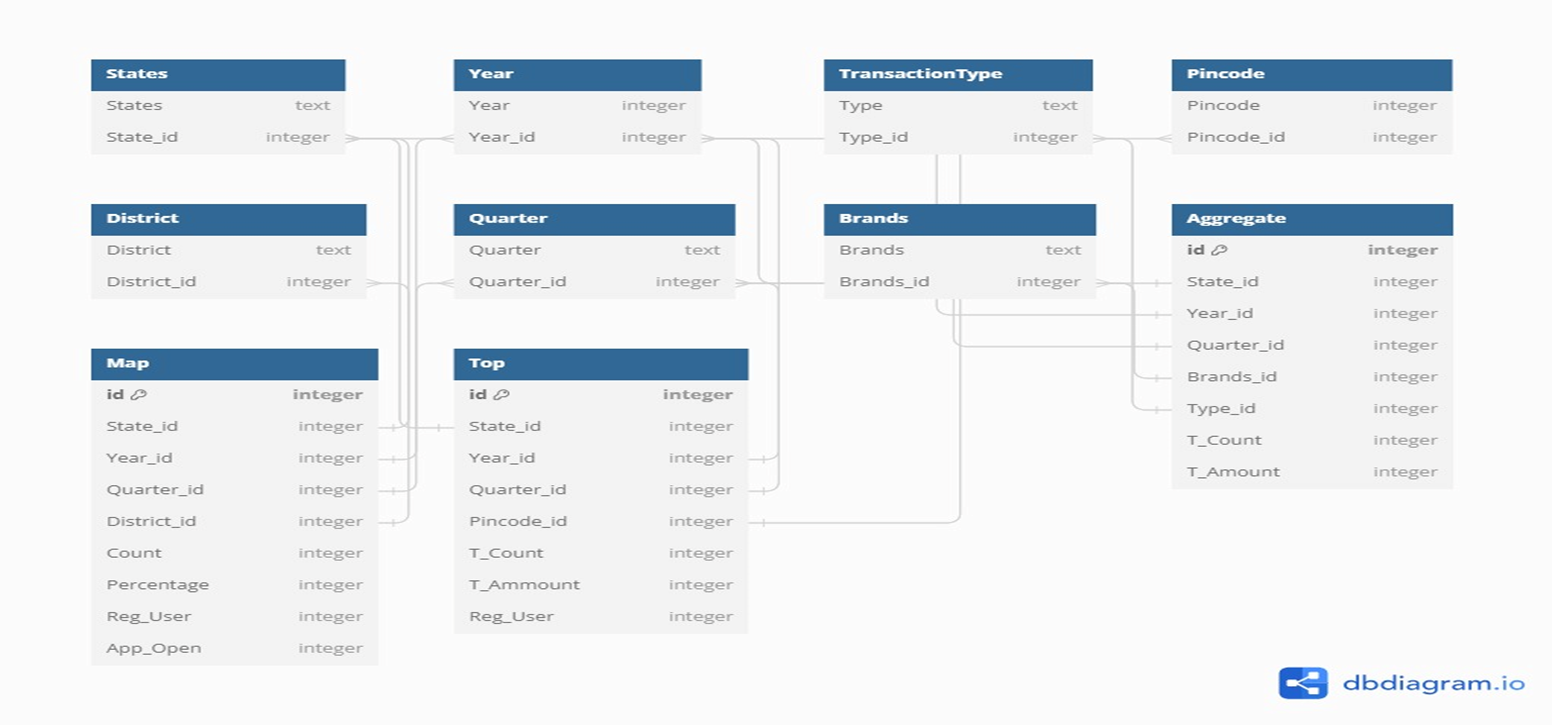

In [26]:
# Importing data from our CSV files
df = pd.read_csv('C:/Users/Judge/Downloads/top_user.csv')
df = df.reset_index()
d = pd.read_csv('C:/Users/Judge/Downloads/top_trans.csv')
d = d.reset_index()
df1 = pd.read_csv('C:/Users/Judge/Downloads/agg_user.csv')
df1 = df1.reset_index()
df2 = pd.read_csv('C:/Users/Judge/Downloads/agg_trans.csv')
df2 = df2.reset_index()
df3 = pd.read_csv('C:/Users/Judge/Downloads/map_user.csv')
df3 = df3.reset_index()
df4 = pd.read_csv('C:/Users/Judge/Downloads/map_trans.csv')
df4 = df4.reset_index()

In [27]:
# Creating state dataframe and assigning unique state id for each state
state=df['State'].unique()
state=pd.DataFrame(state, columns = ['State'])
state['State_ID'] = range(1, len(state) + 1)
state

,State,State_ID
0,andaman-&-nicobar-islands,1
1,andhra-pradesh,2
2,arunachal-pradesh,3
3,assam,4
4,bihar,5
5,chandigarh,6
6,chhattisgarh,7
7,dadra-&-nagar-haveli-&-daman-&-diu,8
8,delhi,9
9,goa,10


In [28]:
# Creating Pincode dataframe and assigning unique Pincode id for each Pincode
Pincode=df['Pincode'].unique()
Pincode=pd.DataFrame(Pincode, columns = ['Pincode'])
Pincode['Pincode_ID'] = range(1, len(Pincode) + 1)
Pincode

,Pincode,Pincode_ID
0,744103,1
1,744101,2
2,744105,3
3,744102,4
4,744104,5
...,...,...
426,700015,427
427,700021,428
428,742304,429
429,700150,430


In [29]:
merged_df = df.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
data_df = merged_df.drop(columns=['State'])
data_df
data_df = data_df.merge(Pincode, on='Pincode', how='inner')

# Removing the 'Pincode' column, which is replaced by 'Pincode_ID'
data_df = data_df.drop(columns=['Pincode'])
data_df

,index,Year,Quarter,RegisteredUsers,State_ID,Pincode_ID
0,0,2018,1,1608,1,1
1,10,2018,2,2188,1,1
2,20,2018,3,2741,1,1
3,30,2018,4,3373,1,1
4,40,2019,1,4136,1,1
...,...,...,...,...,...,...
8206,8180,2022,4,101966,36,430
8207,8190,2023,1,106554,36,430
8208,8199,2023,2,110694,36,430
8209,8209,2023,3,114987,36,430


In [30]:
merged_df = d.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
transaction = merged_df.drop(columns=['State'])
transaction = transaction.merge(Pincode, on='Pincode', how='inner')

# Removing the 'Pincode' column, which is replaced by 'Pincode_ID'
transaction = transaction.drop(columns=['Pincode'])
transaction

,index,Year,Quarter,Transaction_count,Transaction_amount,State_ID,Pincode_ID
0,0,2018,1,1622,2.769298e+06,1,2
1,10,2018,2,2701,6.310090e+06,1,2
2,20,2018,3,3462,1.083389e+07,1,2
3,30,2018,4,4674,1.639286e+07,1,2
4,41,2019,1,5156,1.550131e+07,1,2
...,...,...,...,...,...,...,...
6478,8195,2023,2,2918444,6.259877e+09,36,423
6479,8205,2023,3,3536928,7.193522e+09,36,423
6480,8188,2023,1,2411466,3.984157e+09,36,427
6481,8198,2023,2,2774383,4.372975e+09,36,427


In [31]:
#Connecting to server
conn = sqlite3.connect("DataMining.db")
cursor = conn.cursor()

In [32]:
#Creating tables and committing them to our database
state.to_sql('States', conn, if_exists='replace', index=False)
Pincode.to_sql('Pincodes', conn, if_exists='replace', index=False)
data_df.to_sql('User_Count', conn, if_exists='replace', index=False)
transaction.to_sql('Amount', conn, if_exists='replace', index=False)
conn.commit()

In [33]:
# Creating Transaction_type dataframe and assigning unique Transaction_type id for each Transaction_type, then commiting the table to our database
Transaction_type=df2['Transaction_type'].unique()
Transaction_type=pd.DataFrame(Transaction_type, columns = ['Transaction_type'])
Transaction_type['Transaction_type_ID'] = range(1, len(Transaction_type) + 1)
Transaction_type.to_sql('Transaction_type', conn, if_exists='replace', index=False)
conn.commit()

# Creating Brands dataframe and assigning unique brand id for each brand, then commiting the table to our database
Brands=df1['Brands'].unique()
Brands=pd.DataFrame(Brands, columns = ['Brands'])
Brands['Brand_ID'] = range(1, len(Brands) + 1)
Brands.to_sql('Brands', conn, if_exists='replace', index=False)
conn.commit()

In [34]:
merged_df = df1.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
data_df = merged_df.drop(columns=['State'])
data_df
data_df = data_df.merge(Brands, on='Brands', how='inner')

# Removing the 'Brands' column, which is replaced by 'Brand_ID', then commiting the table to our database
data_df = data_df.drop(columns=['Brands'])
data_df
data_df.to_sql('Agg_User', conn, if_exists='replace', index=False)
conn.commit()

In [35]:
merged_df = df2.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
data_df = merged_df.drop(columns=['State'])
data_df
data_df = data_df.merge(Transaction_type, on='Transaction_type', how='inner')

# Removing the 'Transaction_type' column, which is replaced by 'Transaction_type_ID', then commiting the table to our database
data_df = data_df.drop(columns=['Transaction_type'])
data_df
data_df.to_sql('Agg_Trans', conn, if_exists='replace', index=False)
conn.commit()

In [36]:
# Creating District dataframe and assigning unique District id for each District, then commiting the table to our database
District=df3['District'].unique()
District=pd.DataFrame(District, columns = ['District'])
District['District_ID'] = range(1, len(District) + 1)
District
District.to_sql('District', conn, if_exists='replace', index=False)
conn.commit()

In [37]:
merged_df = df3.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
data_df = merged_df.drop(columns=['State'])
data_df
data_df = data_df.merge(District, on='District', how='inner')

# Removing the 'District' column, which is replaced by 'District_ID', then commiting the table to our database
data_df = data_df.drop(columns=['District'])
data_df
data_df.to_sql('Map_User', conn, if_exists='replace', index=False)
conn.commit()

In [38]:
merged_df = df4.merge(state, on='State', how='inner')

# Removing the 'State' column, which is replaced by 'State_ID'
data_df = merged_df.drop(columns=['State'])
data_df
data_df = data_df.merge(District, on='District', how='inner')

# Removing the 'District' column, which is replaced by 'District_ID', then commiting the table to our database
data_df = data_df.drop(columns=['District'])
data_df
data_df.to_sql('Map_Trans', conn, if_exists='replace', index=False)
conn.commit()

## 4. Exploratory Data Analysis, visualisation & descriptive statistics

In [39]:
#Grouping data by Transaction_type, state and calculating Transaction_count
merged_df1 = data1.merge(data2, on=['State','Year','Quarter'], how='inner')

transaction_counts_by_Transaction_type = merged_df1.groupby(['Transaction_type','State'])['Transaction_count'].sum().sort_values(ascending=False)
print(transaction_counts_by_Transaction_type)

Transaction_type       State                    
Merchant payments      karnataka                    31449656557
                       maharashtra                  29726159694
Peer-to-peer payments  karnataka                    24252431874
                       maharashtra                  23891024058
                       telangana                    23061613751
                                                       ...     
Financial Services     andaman-&-nicobar-islands          94006
                       ladakh                             78507
                       mizoram                            65241
Others                 lakshadweep                         4862
Financial Services     lakshadweep                         3135
Name: Transaction_count, Length: 180, dtype: int64


### 4.1 Visualization and presentation of basic statistics

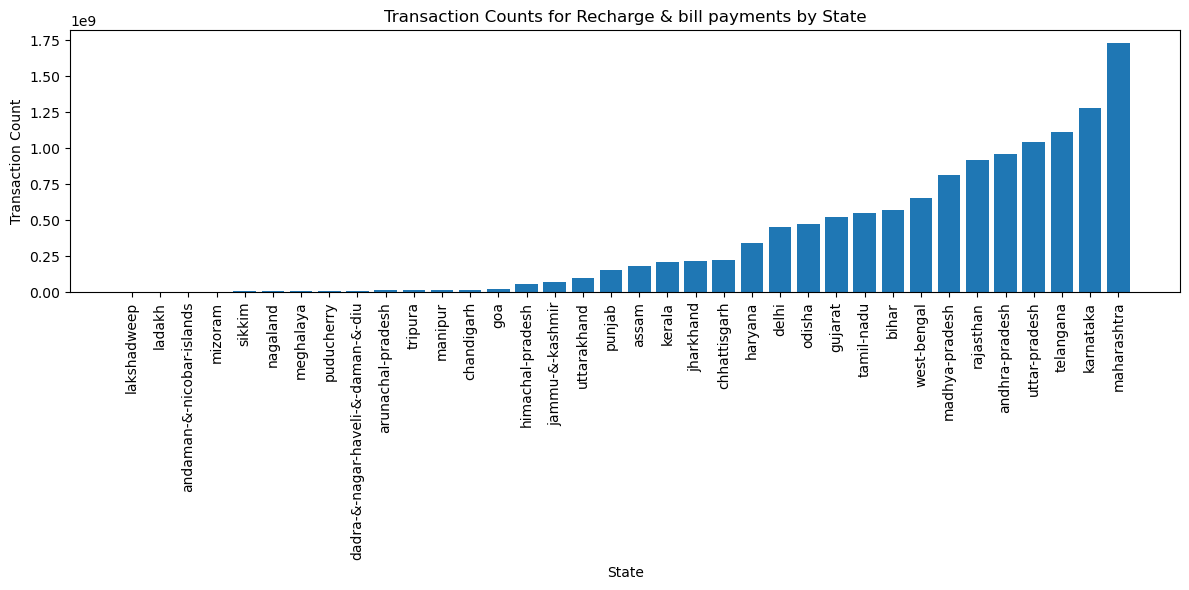

Mean Transaction Count for Recharge & bill payments: 353835596.3333333
Median Transaction Count for Recharge & bill payments: 166495136.5
Mode Transaction Count for Recharge & bill payments: 90055
Standard Deviation Transaction Count for Recharge & bill payments: 445568533.68384707
Variance Transaction Count for Recharge & bill payments: 1.9853131820917357e+17


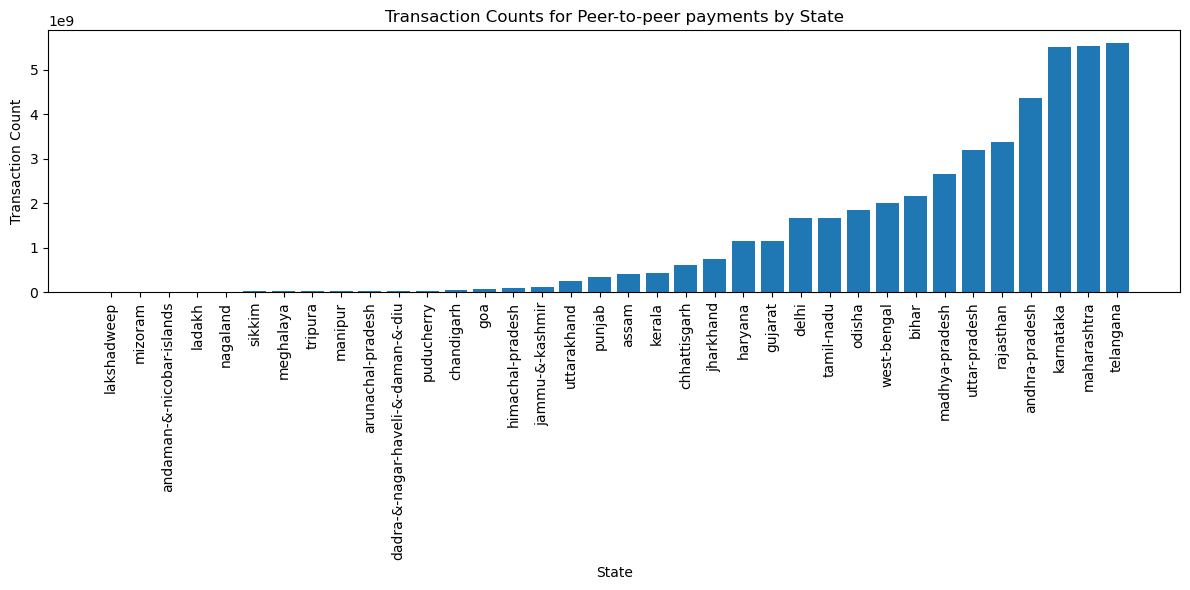

Mean Transaction Count for Peer-to-peer payments: 1255221428.3611112
Median Transaction Count for Peer-to-peer payments: 375369479.0
Mode Transaction Count for Peer-to-peer payments: 126445
Standard Deviation Transaction Count for Peer-to-peer payments: 1733355578.7382178
Variance Transaction Count for Peer-to-peer payments: 3.0045215623429023e+18


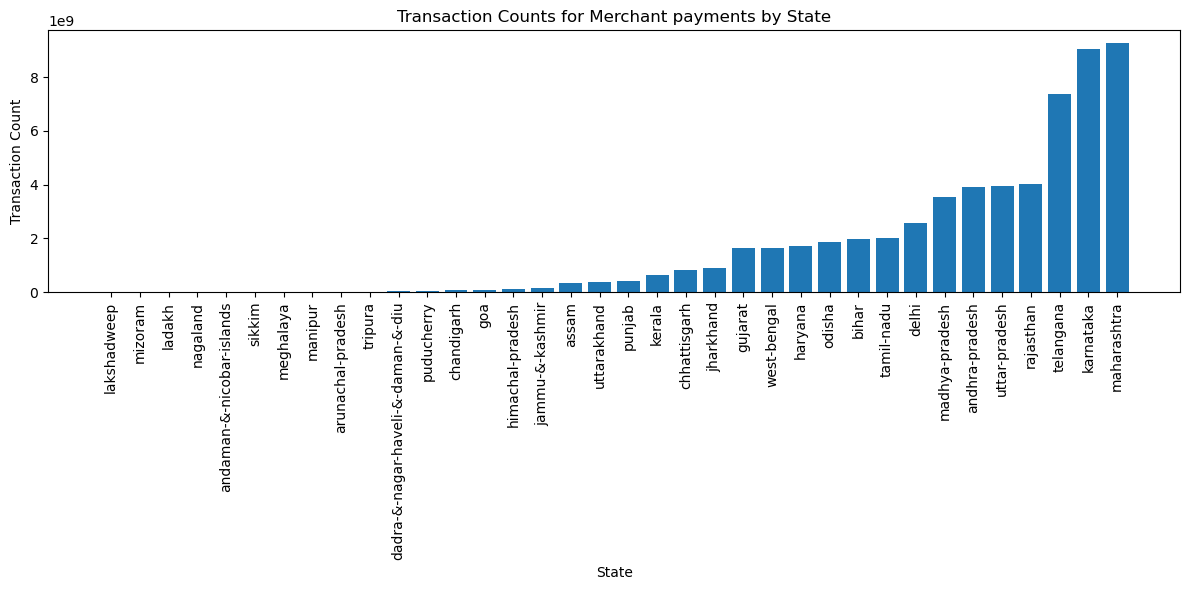

Mean Transaction Count for Merchant payments: 1631392989.3888888
Median Transaction Count for Merchant payments: 402234333.5
Mode Transaction Count for Merchant payments: 57019
Standard Deviation Transaction Count for Merchant payments: 2480096652.3510556
Variance Transaction Count for Merchant payments: 6.150879405002914e+18


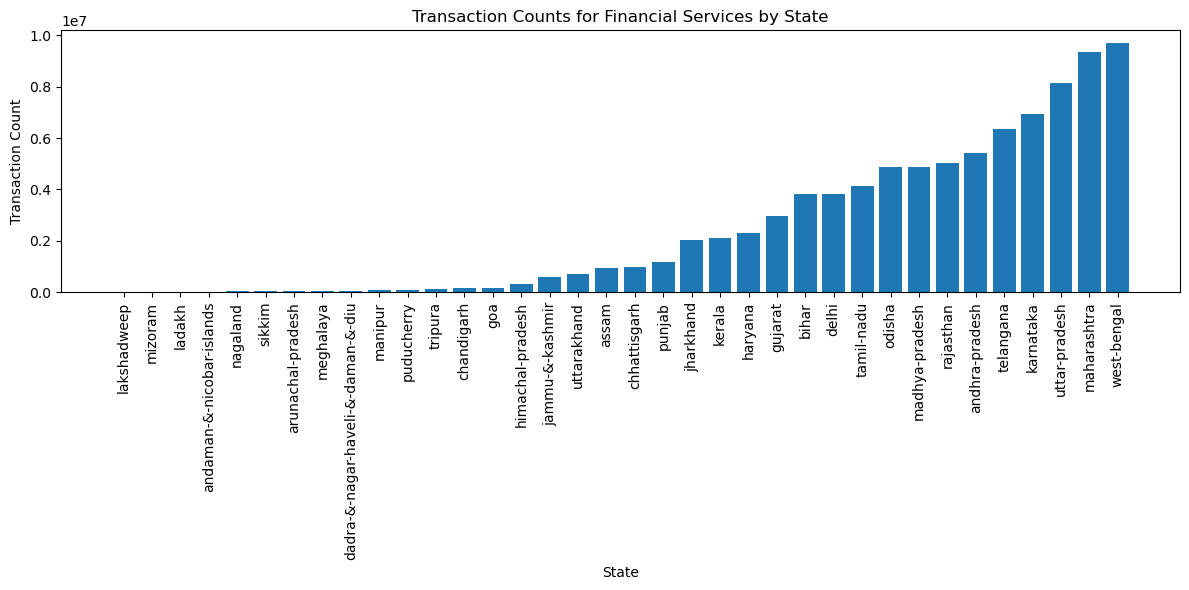

Mean Transaction Count for Financial Services: 2430410.4166666665
Median Transaction Count for Financial Services: 957771.0
Mode Transaction Count for Financial Services: 717
Standard Deviation Transaction Count for Financial Services: 2925958.3328861515
Variance Transaction Count for Financial Services: 8561232165785.907


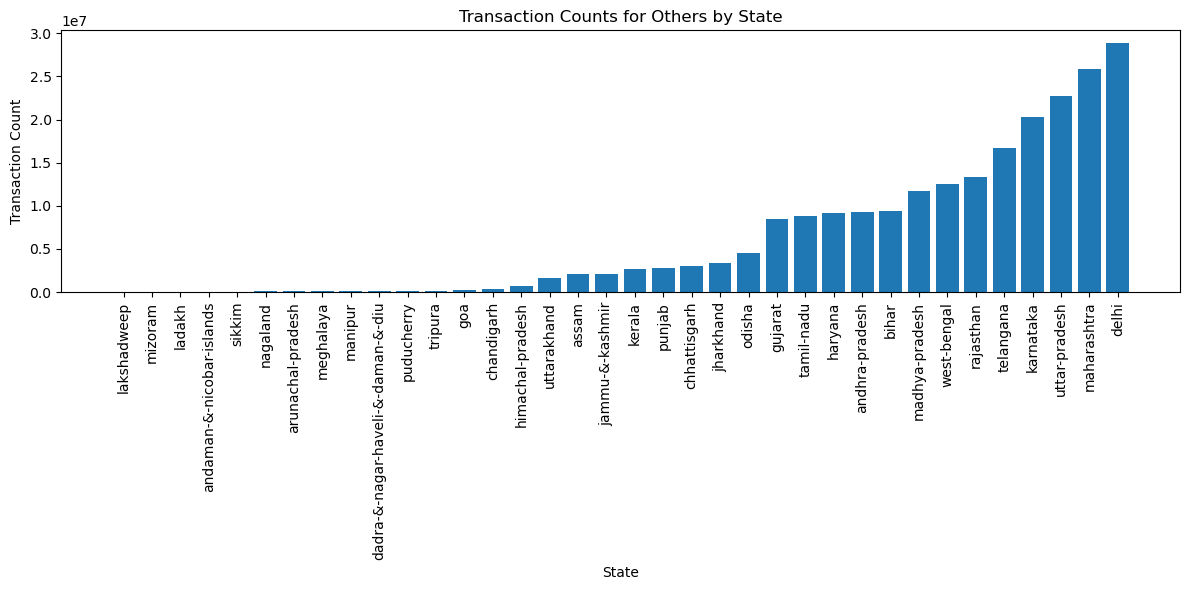

Mean Transaction Count for Others: 6161951.888888889
Median Transaction Count for Others: 2407626.5
Mode Transaction Count for Others: 763
Standard Deviation Transaction Count for Others: 8091510.652989105
Variance Transaction Count for Others: 65472544647436.17


In [40]:
# Reading data from our CSV file
data = pd.read_csv('C:/Users/Judge/Downloads/agg_trans.csv')

# Defining a list of transaction types we want to analyze
transaction_types = ["Recharge & bill payments", "Peer-to-peer payments", "Merchant payments", "Financial Services", "Others"]

# Creating a function to perform the analysis for a single transaction type
def analyze_transaction_type(data, transaction_type):
    # Filtering the data for the specified transaction type
    filtered_data = data[data['Transaction_type'] == transaction_type]
    state_transaction_counts = filtered_data.groupby('State')['Transaction_count'].sum()
    
    # Sorting the data in ascending order
    state_transaction_counts = state_transaction_counts.sort_values()
    
    # Creating and displaying the bar plot in a subplot
    plt.figure(figsize=(12, 6))
    plt.bar(state_transaction_counts.index, state_transaction_counts)
    plt.xlabel('State')
    plt.ylabel('Transaction Count')
    plt.title(f'Transaction Counts for {transaction_type} by State')
    plt.xticks(rotation=90)
    plt.tight_layout() # Adjusting subplot layout
    plt.show()
    
    # Calculating basic statistics
    mean_count = state_transaction_counts.mean()
    median_count = state_transaction_counts.median()
    mode_count = state_transaction_counts.mode().iloc[0]
    std_deviation_count = state_transaction_counts.std()
    variance_count = state_transaction_counts.var()
    
    # Printing the statistics
    print(f"Mean Transaction Count for {transaction_type}:", mean_count)
    print(f"Median Transaction Count for {transaction_type}:", median_count)
    print(f"Mode Transaction Count for {transaction_type}:", mode_count)
    print(f"Standard Deviation Transaction Count for {transaction_type}:", std_deviation_count)
    print(f"Variance Transaction Count for {transaction_type}:", variance_count)

# Performing the analysis for each transaction type and creating subplots
for transaction_type in transaction_types:
    analyze_transaction_type(data, transaction_type)

As seen above, Telangana, Maharashtra and Karnataka have the top 3 transaction counts for Recharge and Bill payments, merchant payments and peer-to-peer payments. These states may have a higher adoption of digital payment methods due to greater need for online bill payments. 

West Bengal jumps to the top in transaction counts for financial services. The simplest explanation for this may be the small transaction countGovernment policies and initiatives aimed at promoting financial inclusion, digital payments, and access to financial services can significantly impact transaction counts in the financial sector. West Bengal might be fostering a business-friendly environment that encourages the growth of financial institutions and fintech companies, leading to higher transaction volumes. 

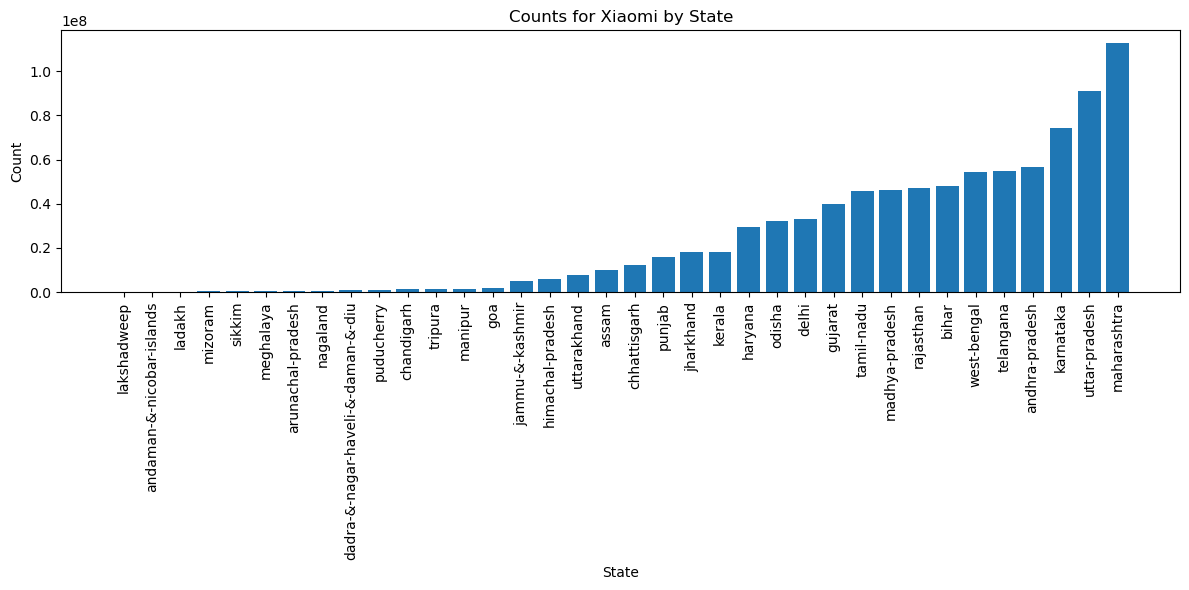

Mean Count for Xiaomi: 24154517.138888888
Median Count for Xiaomi: 11287745.5
Mode Count for Xiaomi: 10374
Standard Deviation Count for Xiaomi: 28958066.271841295
Variance Count for Xiaomi: 838569602204352.5


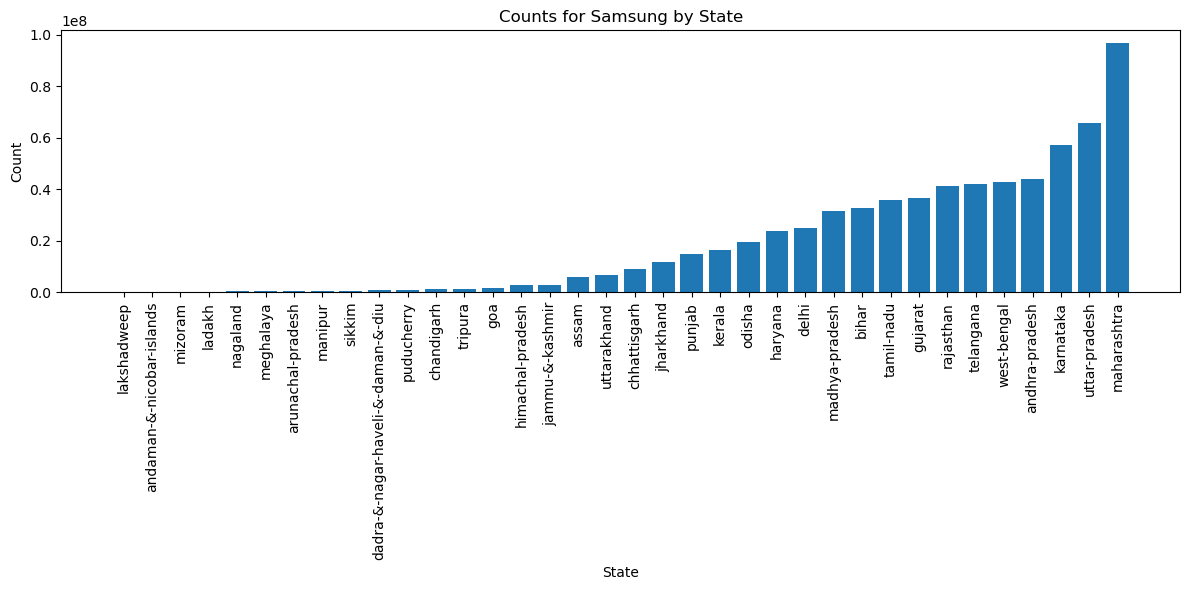

Mean Count for Samsung: 18655658.638888888
Median Count for Samsung: 7706123.5
Mode Count for Samsung: 7714
Standard Deviation Count for Samsung: 23099384.99172029
Variance Count for Samsung: 533581586995712.56


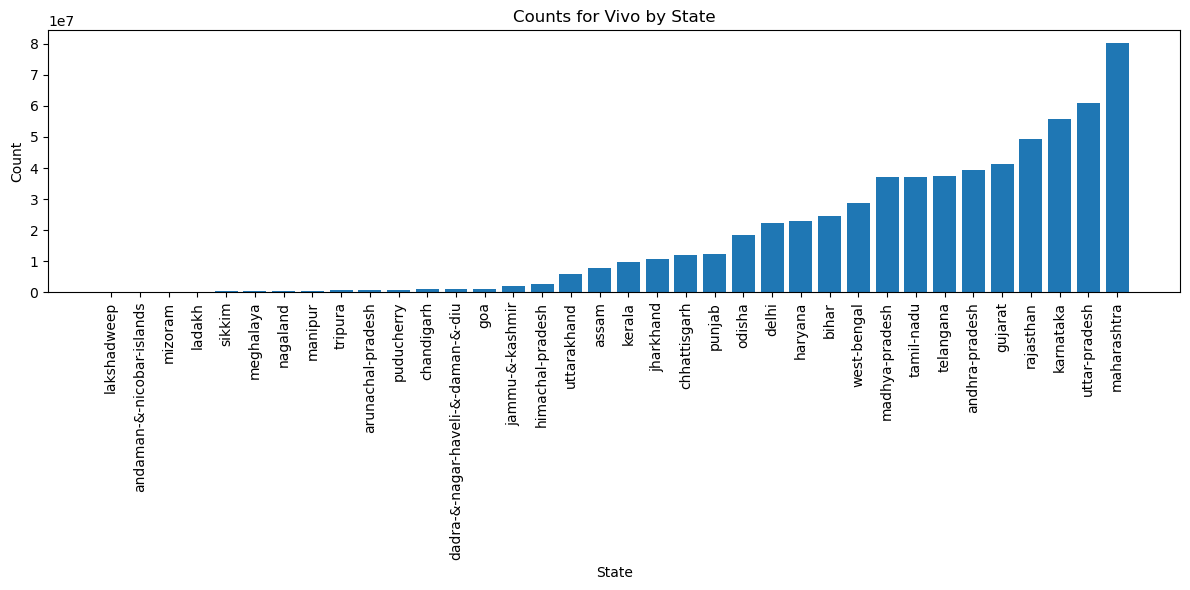

Mean Count for Vivo: 17372639.416666668
Median Count for Vivo: 8691509.0
Mode Count for Vivo: 10976
Standard Deviation Count for Vivo: 21167980.58979002
Variance Count for Vivo: 448083402249727.06


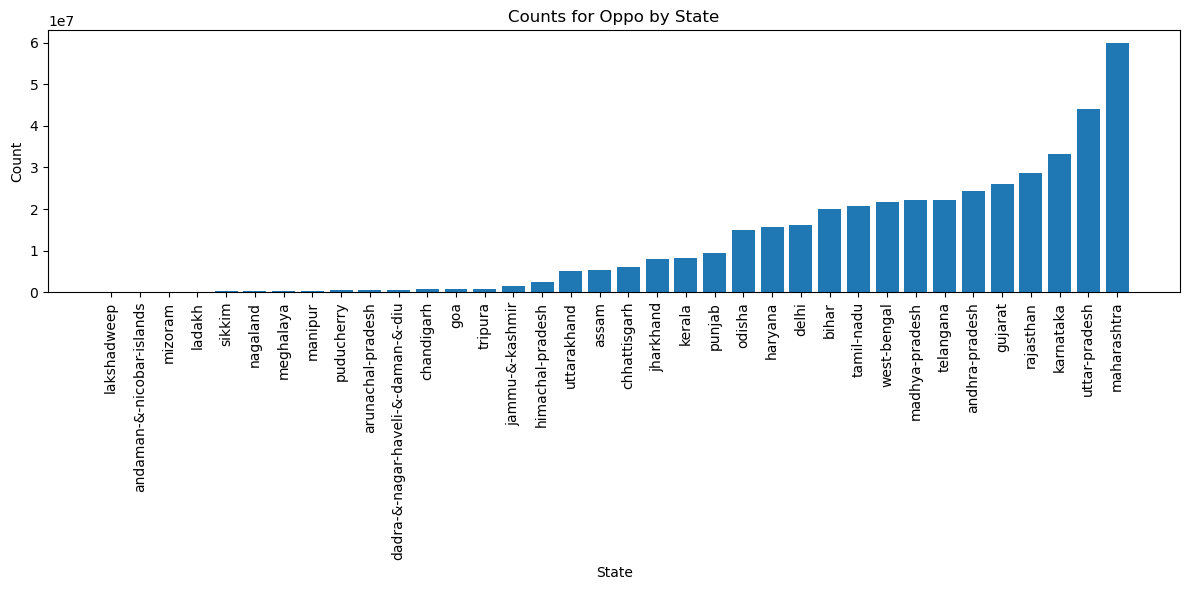

Mean Count for Oppo: 11673617.916666666
Median Count for Oppo: 5679827.5
Mode Count for Oppo: 7846
Standard Deviation Count for Oppo: 14302468.564383892
Variance Count for Oppo: 204560607035189.44


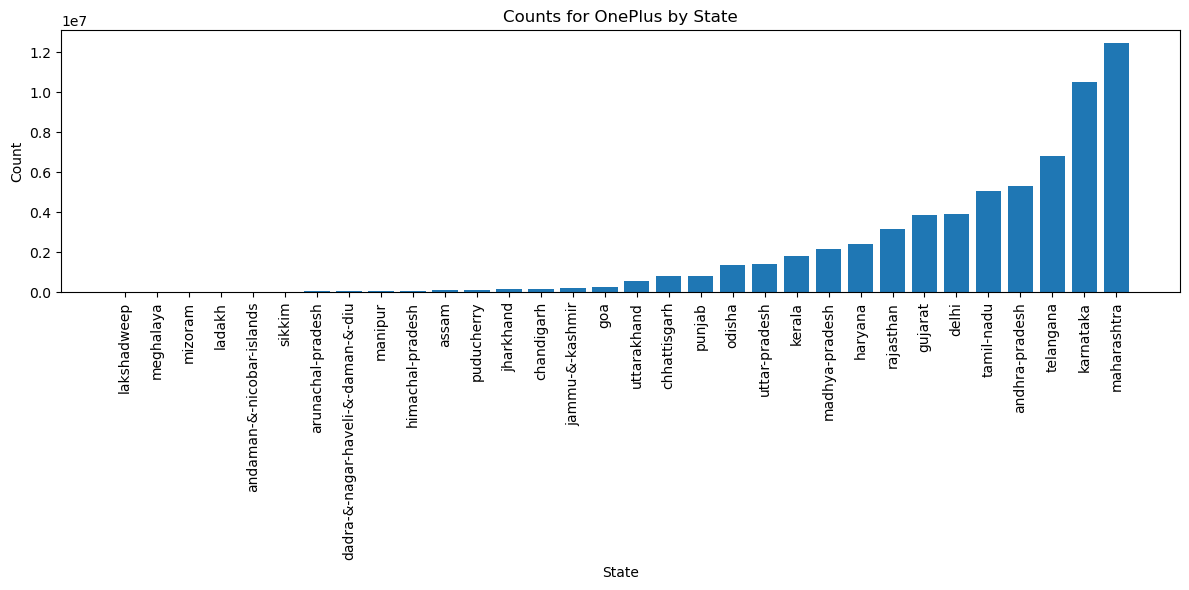

Mean Count for OnePlus: 1989912.84375
Median Count for OnePlus: 409225.0
Mode Count for OnePlus: 1380
Standard Deviation Count for OnePlus: 3106330.392472174
Variance Count for OnePlus: 9649288507196.33


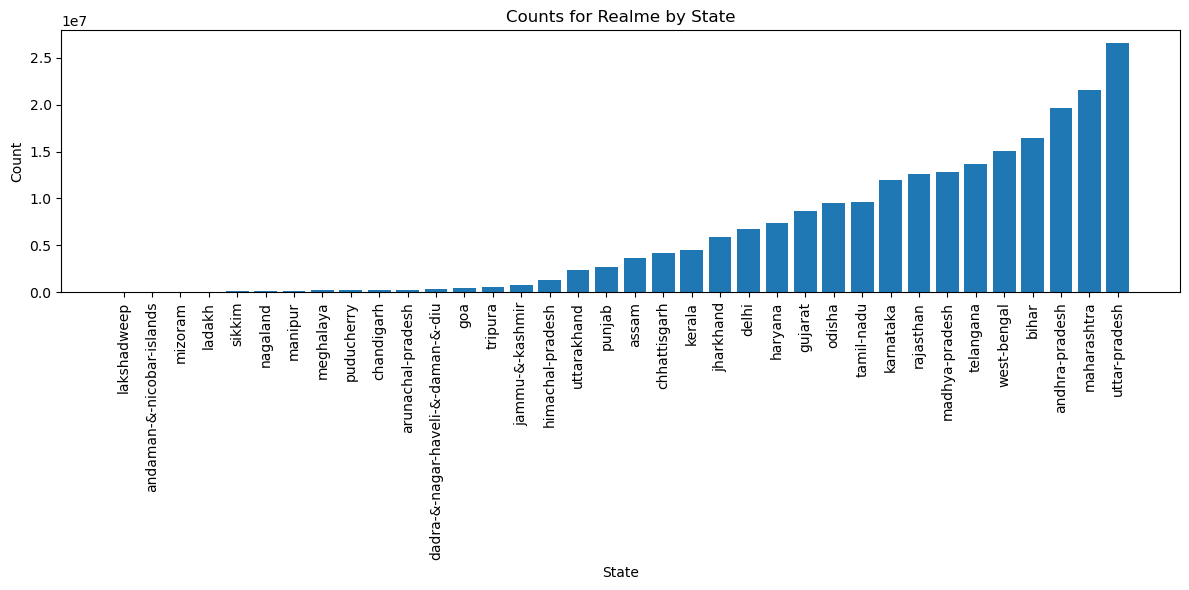

Mean Count for Realme: 6110367.277777778
Median Count for Realme: 3173883.5
Mode Count for Realme: 3375
Standard Deviation Count for Realme: 7212213.2462069355
Variance Count for Realme: 52016019908762.79


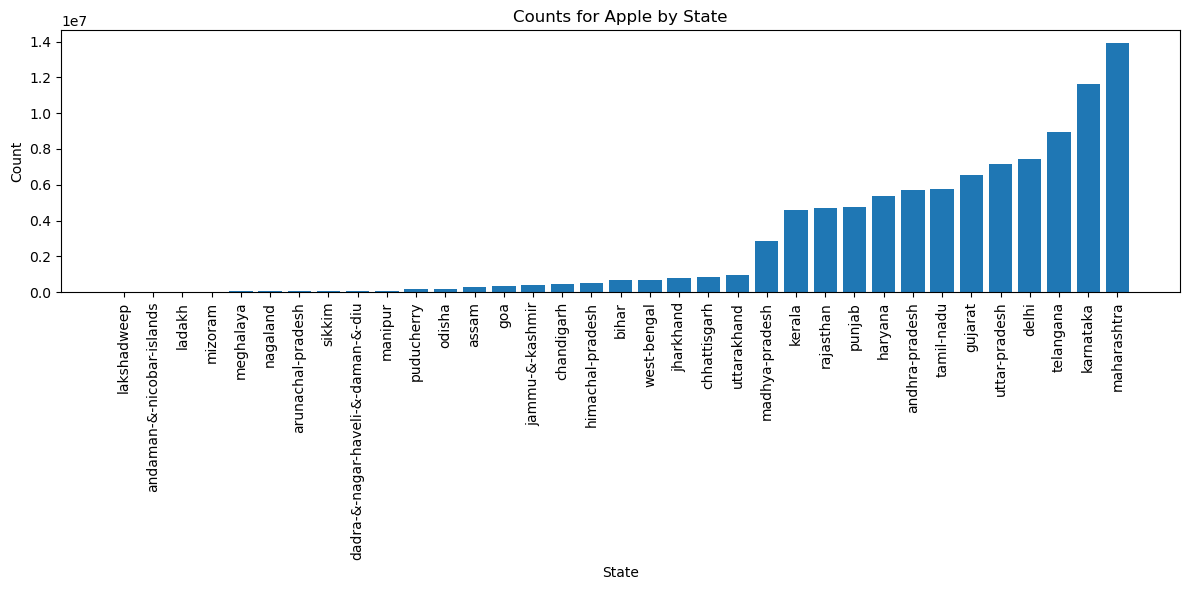

Mean Count for Apple: 2741351.8285714285
Median Count for Apple: 666951.0
Mode Count for Apple: 1450
Standard Deviation Count for Apple: 3710870.2134323004
Variance Count for Apple: 13770557740939.088


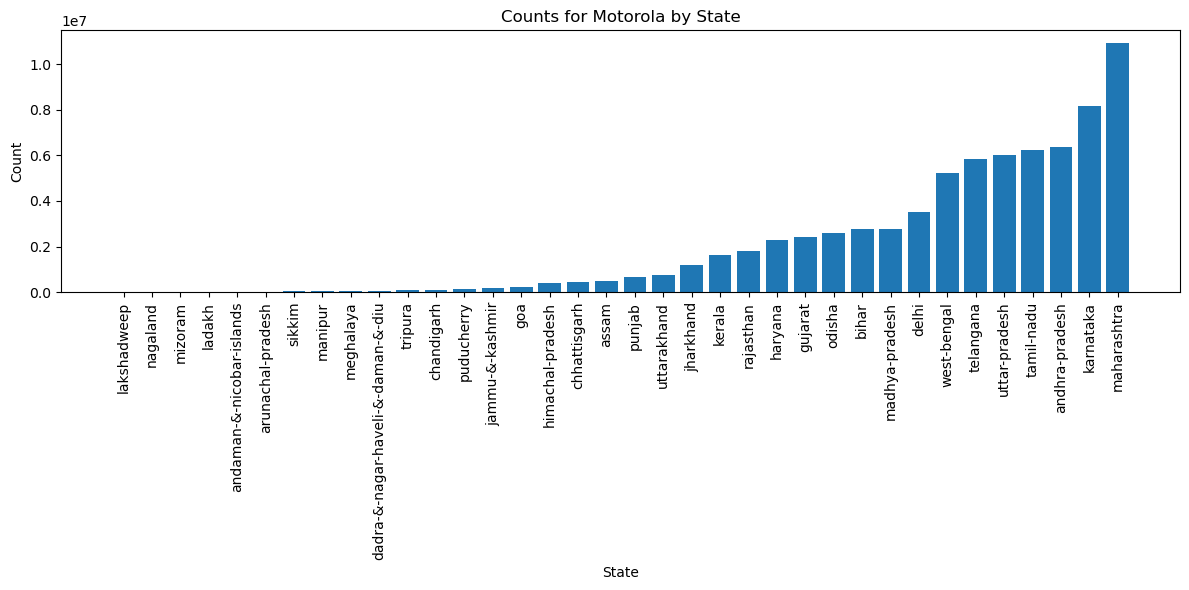

Mean Count for Motorola: 2037242.611111111
Median Count for Motorola: 574094.5
Mode Count for Motorola: 546
Standard Deviation Count for Motorola: 2767406.347155992
Variance Count for Motorola: 7658537890279.271


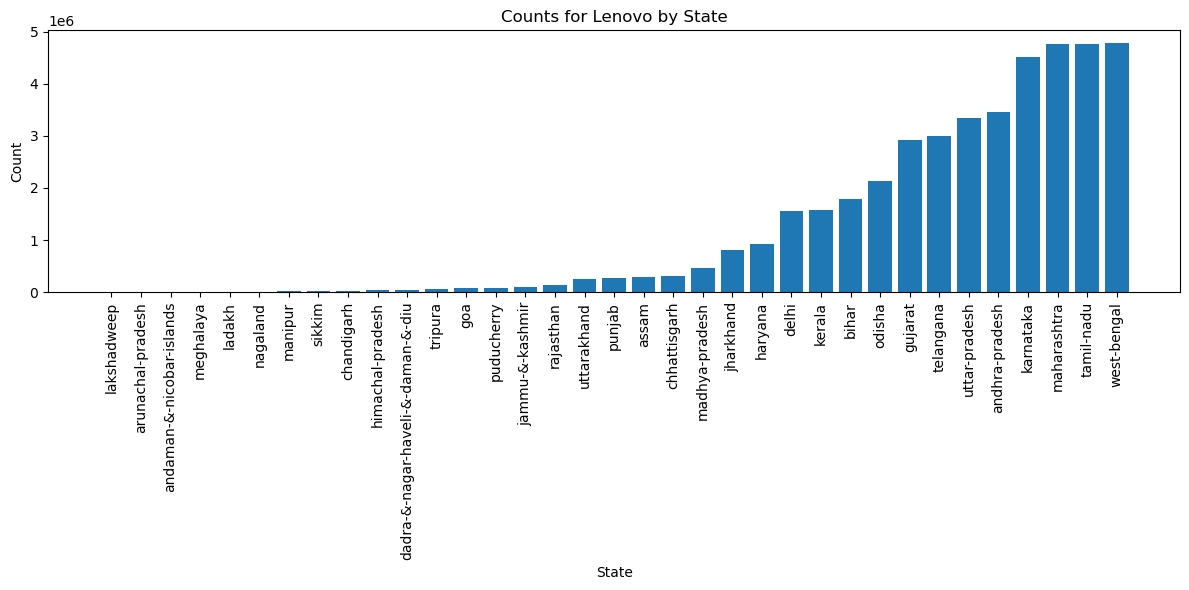

Mean Count for Lenovo: 1216129.9428571428
Median Count for Lenovo: 262530.0
Mode Count for Lenovo: 650
Standard Deviation Count for Lenovo: 1647230.456202452
Variance Count for Lenovo: 2713368175840.938


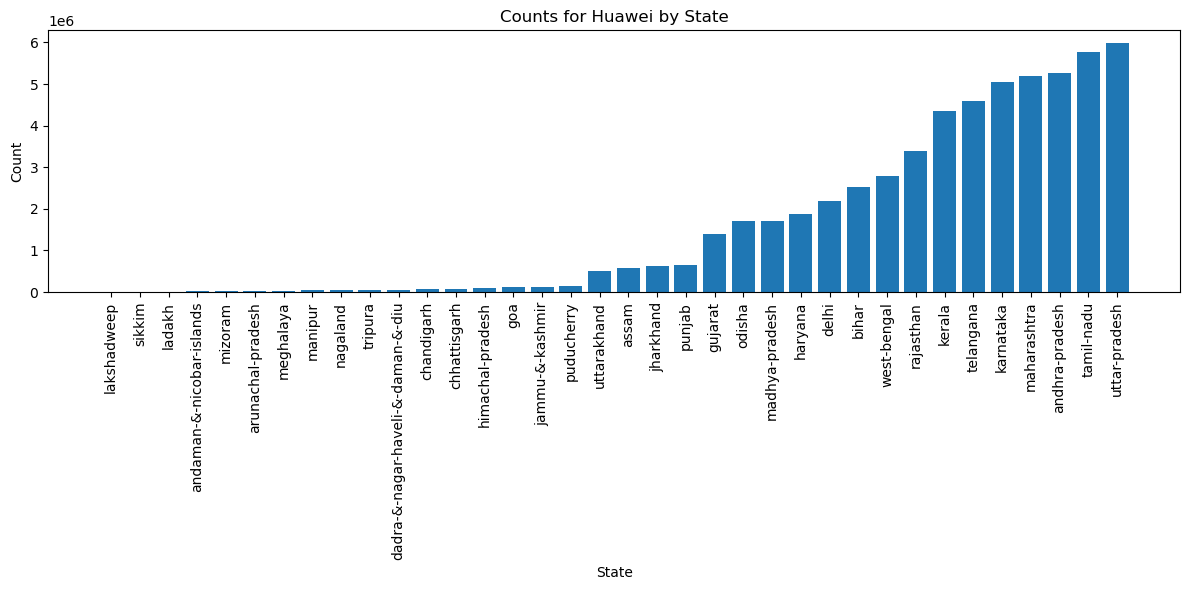

Mean Count for Huawei: 1586935.9166666667
Median Count for Huawei: 549748.5
Mode Count for Huawei: 3859
Standard Deviation Count for Huawei: 2013725.31756172
Variance Count for Huawei: 4055089654589.05


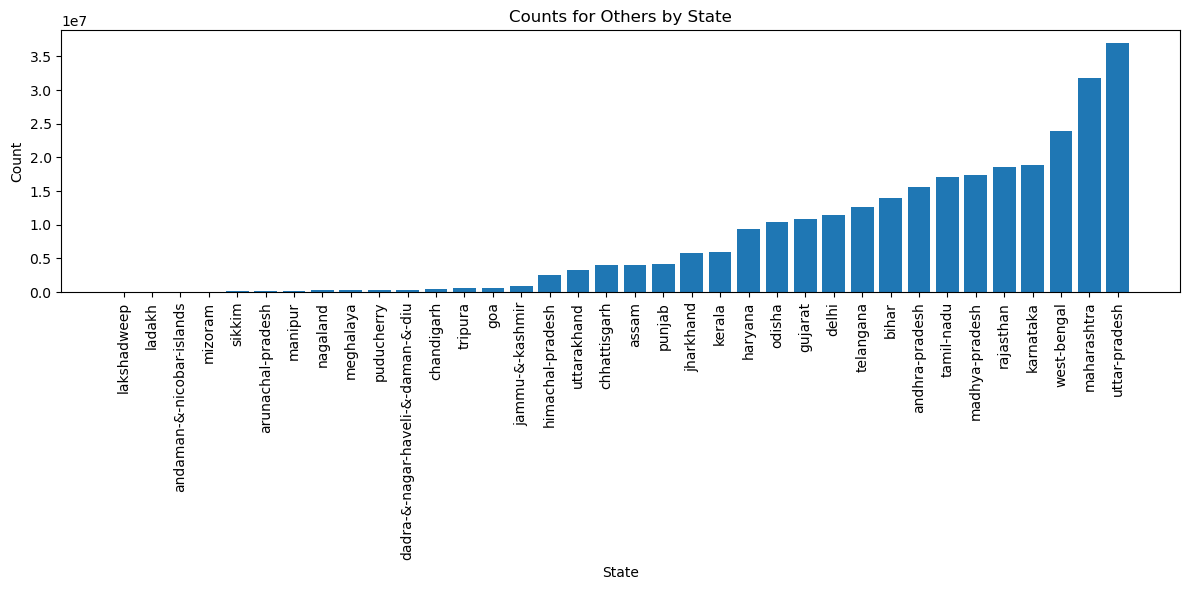

Mean Count for Others: 7859728.722222222
Median Count for Others: 4004935.5
Mode Count for Others: 2915
Standard Deviation Count for Others: 9557247.102190135
Variance Count for Others: 91340972172321.75


In [41]:
# Reading data from our CSV file
data = pd.read_csv("C:/Users/Judge/Downloads/agg_user.csv")

# Defining a list of brands we want to analyze
brands = ["Xiaomi", "Samsung", "Vivo", "Oppo", "OnePlus", "Realme", "Apple", "Motorola", "Lenovo", "Huawei", "Others"]

# Creating a function to perform the analysis for a single brand
def analyze_brand(data, brand):
    # Filter the data for the specified brand
    filtered_data = data[data['Brands'] == brand]
    state_counts = filtered_data.groupby('State')['Count'].sum()
    
    # Sorting the data in ascending order
    state_counts = state_counts.sort_values()
    
    # Creating and displaying the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(state_counts.index, state_counts)
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.title(f'Counts for {brand} by State')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Calculating basic statistics
    mean_count = state_counts.mean()
    median_count = state_counts.median()
    mode_count = state_counts.mode().iloc[0]
    std_deviation_count = state_counts.std()
    variance_count = state_counts.var()
    
    # Printing the statistics
    print(f"Mean Count for {brand}:", mean_count)
    print(f"Median Count for {brand}:", median_count)
    print(f"Mode Count for {brand}:", mode_count)
    print(f"Standard Deviation Count for {brand}:", std_deviation_count)
    print(f"Variance Count for {brand}:", variance_count)

# Performing the analysis for each brand
for brand in brands:
    analyze_brand(data, brand)


Maharashtra seems to peek in terms of most brand users' state locations, indicating that the state may have the most no. of users using online payments, hence the most digital payments friendly state.

#### Calculating average transaction amounts for different payment categories and visualising it in ascending order

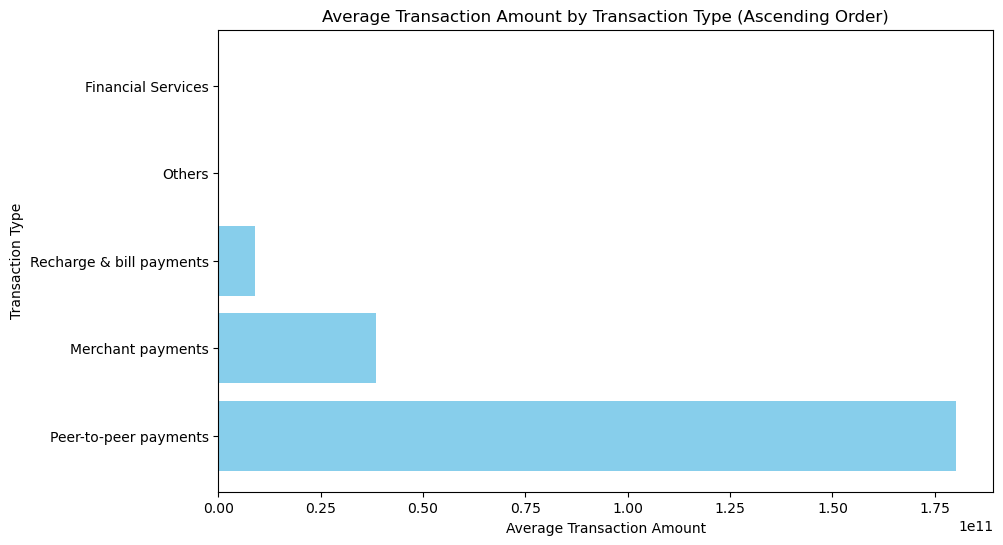

In [42]:
# Reading data from our CSV file
data = pd.read_csv("C:/Users/Judge/downloads/agg_trans.csv")

# Creating a list of transaction types we want to calculate averages for
transaction_types = ["Recharge & bill payments", "Peer-to-peer payments", "Merchant payments", "Financial Services", "Others"]

# Creating an empty dictionary to store results
average_transaction_amounts = {}

# Iterating through the transaction types and calculating the average
for transaction_type in transaction_types:
    # Filtering the data for the current transaction type
    filtered_data = data[data['Transaction_type'] == transaction_type]
    
    # Calculating the average transaction amount for the current type
    average_amount = filtered_data['Transaction_amount'].mean()
    
    # Storing the result in the dictionary
    average_transaction_amounts[transaction_type] = average_amount

# Sorting the dictionary by average amounts in ascending order
sorted_average_transaction_amounts = dict(sorted(average_transaction_amounts.items(), key=lambda item: item[1]))

# Extracting the sorted transaction types and average amounts
sorted_transaction_types = list(sorted_average_transaction_amounts.keys())
sorted_average_amounts = list(sorted_average_transaction_amounts.values())

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_transaction_types, sorted_average_amounts, color='skyblue')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Transaction Type')
plt.title('Average Transaction Amount by Transaction Type (Ascending Order)')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

#### Calculating average transaction value for different transaction types and visualising findings

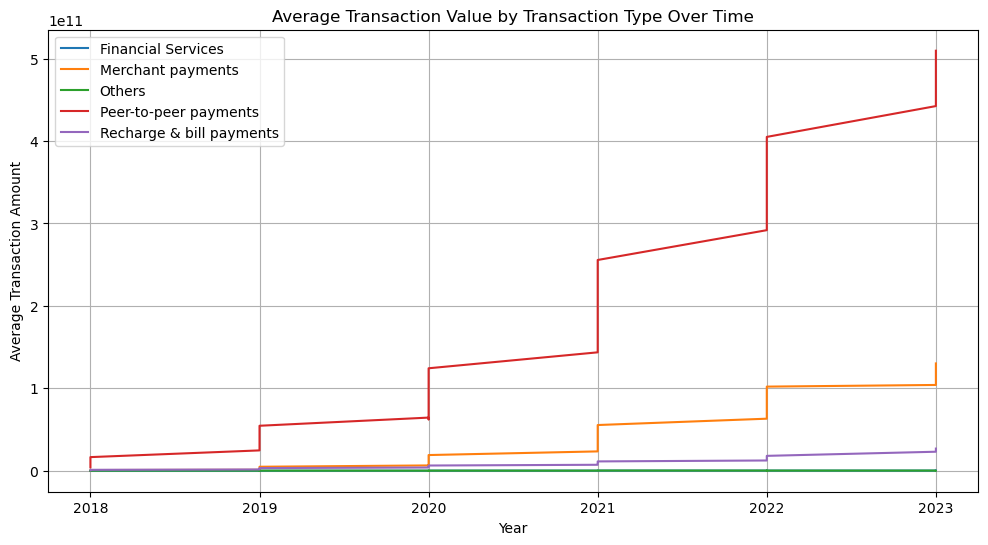

In [43]:
# Loading our transaction data from the CSV file
data = pd.read_csv("C:/Users/Judge/downloads/agg_trans.csv")

# Calculating the average transaction value for different transaction types across quarters and years.
average_transaction_by_type = data.groupby(['Transaction_type', 'Year', 'Quarter'])['Transaction_amount'].mean().reset_index()

# Creating a plot to visualize how the average transaction value varies over time for each transaction type.
plt.figure(figsize=(12, 6))

# Using a line chart with separate lines for each transaction type.
for transaction_type, group in average_transaction_by_type.groupby('Transaction_type'):
    plt.plot(group['Year'], group['Transaction_amount'], label=transaction_type)

plt.xlabel('Year')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Value by Transaction Type Over Time')
plt.legend()
plt.grid(True)
plt.show()

As eminent, there's consistent growth in average transactions for each transaction type over the years. Most significant growth has been seen in peer-to-peer payments, followed by merchant payments indicating that a lot of users who use digital payments system use it quite often to send money to each other. 

In [44]:
df1 = pd.read_csv('C:/Users/Judge/Downloads/map_trans.csv')
df2 = pd.read_csv('C:/Users/Judge/Downloads/map_user.csv')


In [45]:
df = df1.merge(df2, on=['State','Year','Quarter','District'], how='inner')

In [46]:
df.nunique()

State                36
Year                  6
Quarter               4
District            723
Count             16756
Amount            16832
RegisteredUser    16480
AppOpens          13172
dtype: int64

In [47]:
# Grouping by 'State' and 'Year', and calculating the median of 'AppOpens'
median_appopens = df.groupby(['State', 'Year'])['AppOpens'].transform('median')

# Replacing 0 values with state-specific medians using numpy.where
condition = (df['AppOpens'] == 0)
df['AppOpens'] = np.where(condition, median_appopens, df['AppOpens'])


In [48]:
df[(df['AppOpens'] == 0) & (df['Year'] == 2018)]


,State,Year,Quarter,District,Count,Amount,RegisteredUser,AppOpens
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,442,9.316631e+05,632,0.0
1,andaman-&-nicobar-islands,2018,1,south andaman district,5688,1.256025e+07,5846,0.0
2,andaman-&-nicobar-islands,2018,1,nicobars district,528,1.139849e+06,262,0.0
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,825,1.317863e+06,911,0.0
4,andaman-&-nicobar-islands,2018,2,south andaman district,9395,2.394824e+07,8143,0.0
...,...,...,...,...,...,...,...,...
16390,west-bengal,2018,4,nadia district,1602207,1.483070e+09,325690,0.0
16391,west-bengal,2018,4,birbhum district,4639212,6.605151e+09,228310,0.0
16392,west-bengal,2018,4,purba medinipur district,1603344,1.962877e+09,323889,0.0
16393,west-bengal,2018,4,maldah district,1248022,1.571814e+09,225768,0.0


In [49]:
cm = df.groupby('Year')[['Count','Amount']].sum().sort_values(by='Count',ascending=False).reset_index()

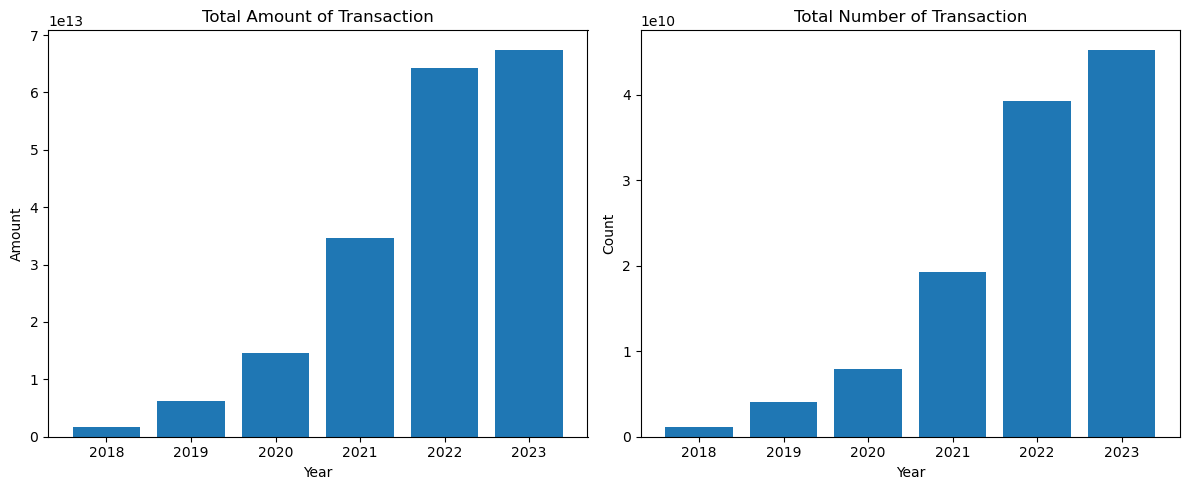

In [50]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first bar chart on the first subplot (ax1)
ax1.bar(cm['Year'], cm['Amount'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.set_title('Total Amount of Transaction')

# Plot the second bar chart on the second subplot (ax2)
ax2.bar(cm['Year'], cm['Count'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.set_title('Total Number of Transaction')

# Adjust layout
plt.tight_layout()

# Show the plots side by side
plt.show()


Each year, there is a consistent growth in both the quantity and value of transactions. This growth is indicative of positive trends in digital payment adoption.

In [51]:

sum_largest = df.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index()

sum_largest

,State,Amount
0,telangana,2.446386e+13
1,maharashtra,2.249180e+13
2,karnataka,2.210804e+13
3,andhra-pradesh,1.899326e+13
4,rajasthan,1.416395e+13
5,uttar-pradesh,1.351442e+13
6,madhya-pradesh,1.052929e+13
7,bihar,9.062822e+12
8,west-bengal,7.947656e+12
9,delhi,7.093175e+12


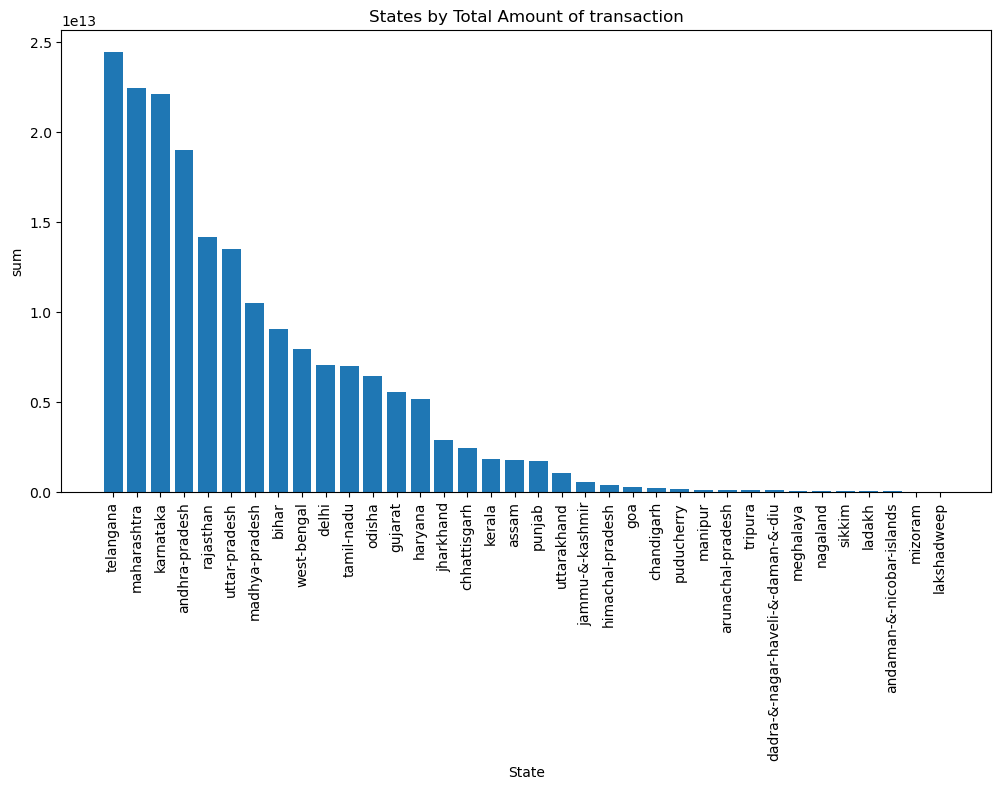

In [52]:
# Assuming 'sum_largest' DataFrame contains the data you want to plot
plt.figure(figsize=(12,6))  # Adjust the figure size as needed

# Create a bar plot
plt.bar(sum_largest['State'], sum_largest['Amount'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('sum')
plt.title('States by Total Amount of transaction')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [53]:
sum_largest = df.groupby('State')['Count'].sum().sort_values(ascending=False).reset_index()
sum_largest

,State,Count
0,maharashtra,16592144890
1,karnataka,15851869593
2,telangana,14124623312
3,andhra-pradesh,9248341606
4,rajasthan,8361862049
5,uttar-pradesh,8205216641
6,madhya-pradesh,7025112483
7,delhi,4713503838
8,bihar,4711432484
9,west-bengal,4324605028


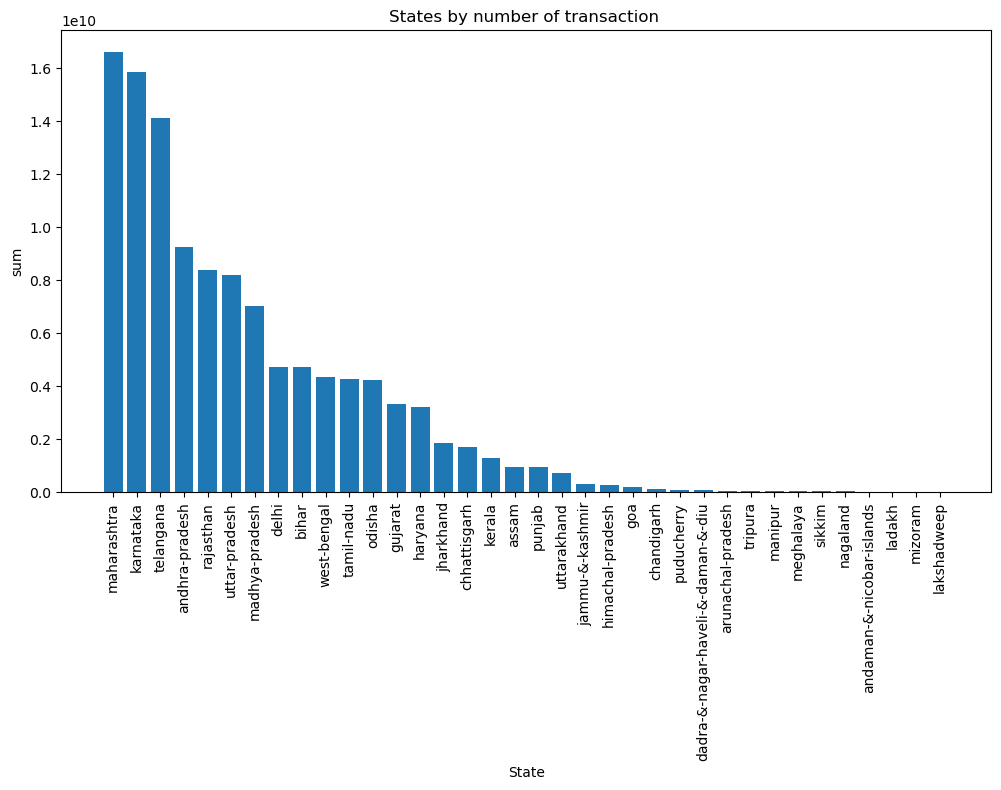

In [54]:
# Assuming 'sum_largest' DataFrame contains the data you want to plot
plt.figure(figsize=(12,6))  # Adjust the figure size as needed

# Create a bar plot
plt.bar(sum_largest['State'], sum_largest['Count'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('sum')
plt.title('States by number of transaction ')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

- There appears to be a positive correlation between the total transaction amount and the number of transactions. States with higher transaction amounts tend to have a larger number of transactions.
- While Telangana has the highest transaction amount, Maharashtra has the highest number of transactions. This suggests that Telangana has larger average transaction amounts, while Maharashtra has a higher volume of transactions.

0    2018
1    2019
2    2020
3    2021
4    2022
5    2023
Name: Year, dtype: int64 0     292797347
1     602811578
2     922009385
3    1269755730
4    1614644108
5    1417685942
Name: RegisteredUser, dtype: int64


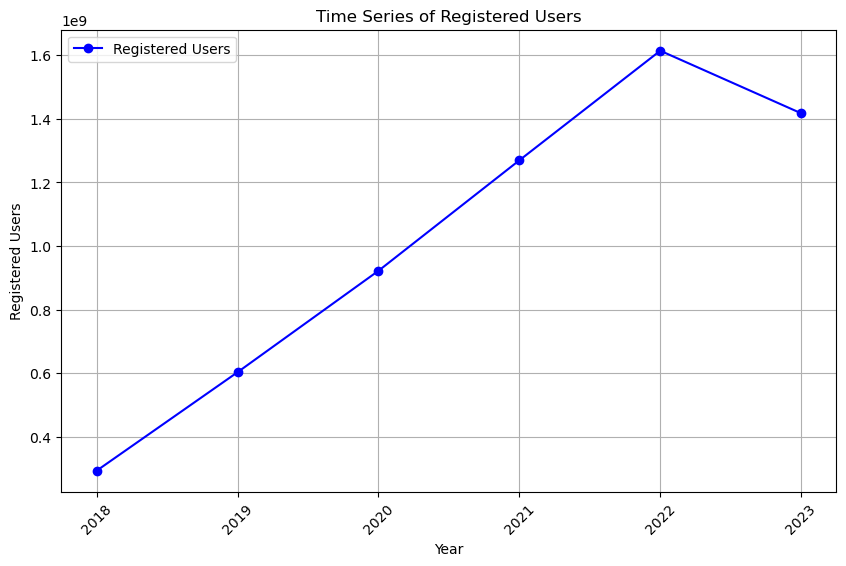

In [55]:

# Extract the data for RegisteredUsers
registered_users_data = df.groupby(['Year'])['RegisteredUser'].sum().reset_index()

# Define the time series and data series
time_series = registered_users_data['Year']
registered_users_series = registered_users_data['RegisteredUser']
print(time_series,registered_users_series)

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(time_series, registered_users_series, marker='o', color='blue', linestyle='-', label='Registered Users')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Registered Users')
plt.title('Time Series of Registered Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


0    2018
1    2019
2    2020
3    2021
4    2022
5    2023
Name: Year, dtype: int64 0    0.000000e+00
1    9.569145e+09
2    2.232745e+10
3    4.569481e+10
4    7.399647e+10
5    7.508353e+10
Name: AppOpens, dtype: float64


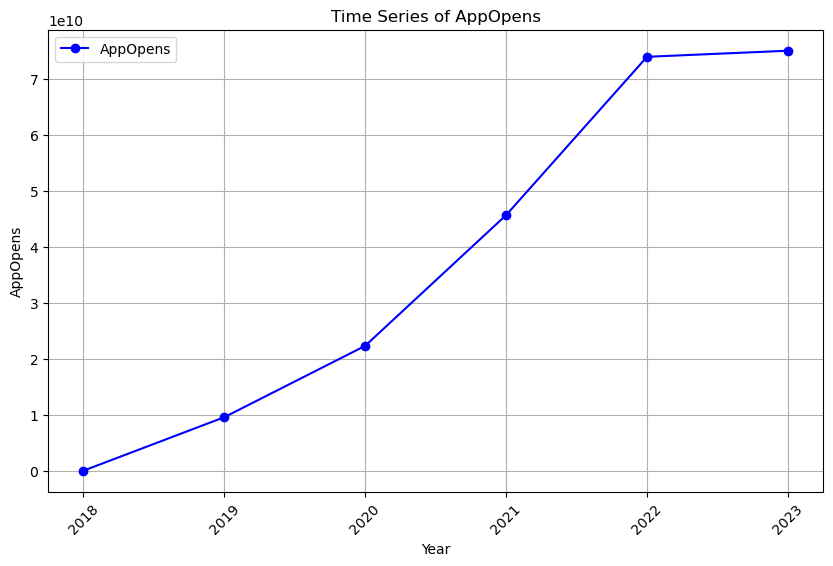

In [56]:

# Extract the data for RegisteredUsers
registered_users_data = df.groupby(['Year'])['AppOpens'].sum().reset_index()

# Define the time series and data series
time_series = registered_users_data['Year']
registered_users_series = registered_users_data['AppOpens']
print(time_series,registered_users_series)

# Create the time series plot
plt.figure(figsize=(10, 6))
plt.plot(time_series, registered_users_series, marker='o', color='blue', linestyle='-', label='AppOpens')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('AppOpens')
plt.title('Time Series of AppOpens')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


The data indicates that over the years, there is a clear upward trend in both the number of registered users and the frequency of app openings.

In [57]:
df['AverageAmountPerRegisteredUser'] = df['Amount'] / df['RegisteredUser']
df.head()

,State,Year,Quarter,District,Count,Amount,RegisteredUser,AppOpens,AverageAmountPerRegisteredUser
0,andaman-&-nicobar-islands,2018,1,north and middle andaman district,442,9.316631e+05,632,0.0,1474.150438
1,andaman-&-nicobar-islands,2018,1,south andaman district,5688,1.256025e+07,5846,0.0,2148.520244
2,andaman-&-nicobar-islands,2018,1,nicobars district,528,1.139849e+06,262,0.0,4350.567944
3,andaman-&-nicobar-islands,2018,2,north and middle andaman district,825,1.317863e+06,911,0.0,1446.611508
4,andaman-&-nicobar-islands,2018,2,south andaman district,9395,2.394824e+07,8143,0.0,2940.959783


In [58]:
# Group by 'State' and calculate the mean of 'AverageAmountPerRegisteredUser'
state_avg_amount = df.groupby('State')['AverageAmountPerRegisteredUser'].mean()

# Find the top 10 states
top_10_states = state_avg_amount.sort_values(ascending=False).reset_index()

# Display the top 10 states based on 'AverageAmountPerRegisteredUser'
top_10_states

,State,AverageAmountPerRegisteredUser
0,telangana,36889.693686
1,andhra-pradesh,35644.157289
2,karnataka,25280.076967
3,delhi,24016.237889
4,andaman-&-nicobar-islands,21974.397492
5,rajasthan,21235.276535
6,odisha,21128.134049
7,maharashtra,20825.941811
8,madhya-pradesh,19512.834449
9,bihar,19240.477961


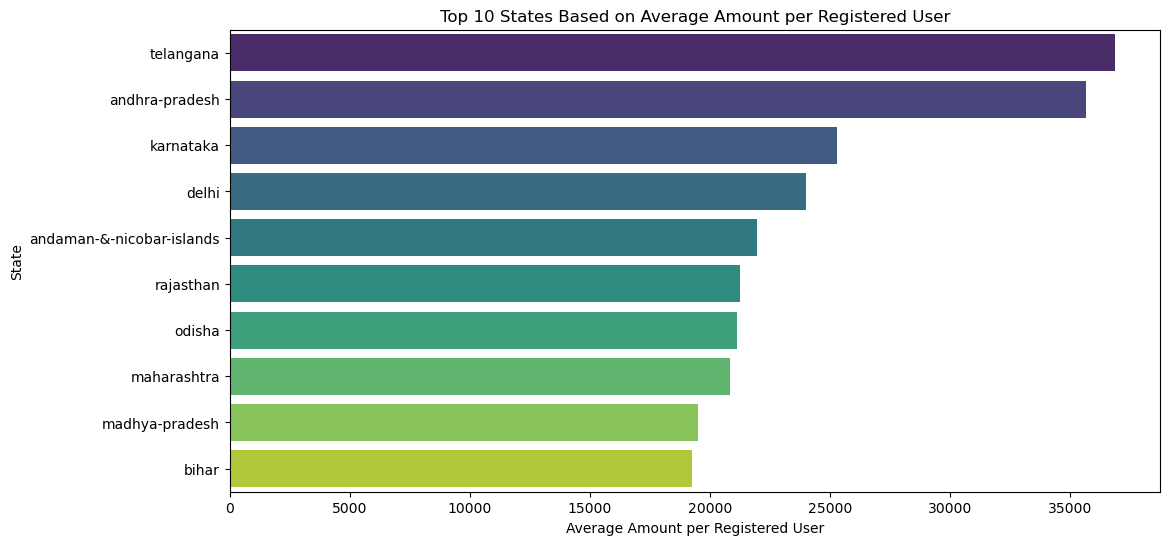

In [59]:
# Create a bar plot for the top 10 states
plt.figure(figsize=(12, 6))
sns.barplot(x='AverageAmountPerRegisteredUser', y='State', data=top_10_states.head(10), palette='viridis')
plt.xlabel('Average Amount per Registered User')
plt.ylabel('State')
plt.title('Top 10 States Based on Average Amount per Registered User')
plt.show()

States with lower average amounts may represent growth opportunities for digital payment providers. By understanding the unique needs and challenges in these states, platforms can tailor their services to encourage higher-value transactions.

In [60]:
# Find the top 10 states based on amount
top_10_states_amount = df.groupby('State')['Amount'].sum().nlargest(10).index

# Filter the DataFrame to include only the top 10 states
top_10_states_df = df[df['State'].isin(top_10_states_amount)]

# Find the top district for each of the top 10 states
top_districts = top_10_states_df.groupby(['State', 'District'])['Amount'].sum().nlargest(10)

# Reset the index to get the top district for each state
top_districts.reset_index()

# Display the top districts for the top ten states in terms of amount
top_districts


State           District                   
karnataka       bengaluru urban district       1.174229e+13
telangana       hyderabad district             9.123910e+12
maharashtra     pune district                  6.135307e+12
rajasthan       jaipur district                5.285824e+12
telangana       rangareddy district            3.628242e+12
                medchal malkajgiri district    2.948060e+12
andhra-pradesh  visakhapatnam district         2.519904e+12
delhi           central district               2.204939e+12
bihar           patna district                 2.196677e+12
madhya-pradesh  bhopal district                2.079208e+12
Name: Amount, dtype: float64

- States like Karnataka and Maharashtra are economic hubs with high transaction amounts.
- Top districts such as Bengaluru and Pune are urban centers with significant digital transactions

In [61]:
# Find the bottom 10 states based on amount
bottom_10_states_amount = df.groupby('State')['Amount'].sum().nsmallest(10).index

# Filter the DataFrame to include only the bottom 10 states
bottom_10_states_df = df[df['State'].isin(bottom_10_states_amount)]

# Find the smallest district for each of the bottom 10 states
smallest_districts = bottom_10_states_df.groupby(['State', 'District'])['Amount'].sum().nsmallest(10)

# Reset the index to get the smallest district for each state
smallest_districts.reset_index()

# Display the smallest districts for the bottom ten states in terms of amount
smallest_districts


State              District                       
arunachal-pradesh  dibang valley district             2.527147e+08
                   pakke kessang district             3.551765e+08
                   shi yomi district                  3.635494e+08
                   kamle district                     5.895069e+08
                   kurung kumey district              7.169895e+08
meghalaya          south west khasi hills district    7.217270e+08
nagaland           longleng district                  7.558159e+08
lakshadweep        lakshadweep district               7.730594e+08
arunachal-pradesh  kra daadi district                 8.972200e+08
nagaland           kiphire district                   9.375571e+08
Name: Amount, dtype: float64

- States like Arunachal Pradesh and Meghalaya, along with smaller districts, face challenges in digital payment adoption, indicating rural or less developed areas.
- Identifying these areas offers opportunities for growth and targeted strategies to promote digital payments.

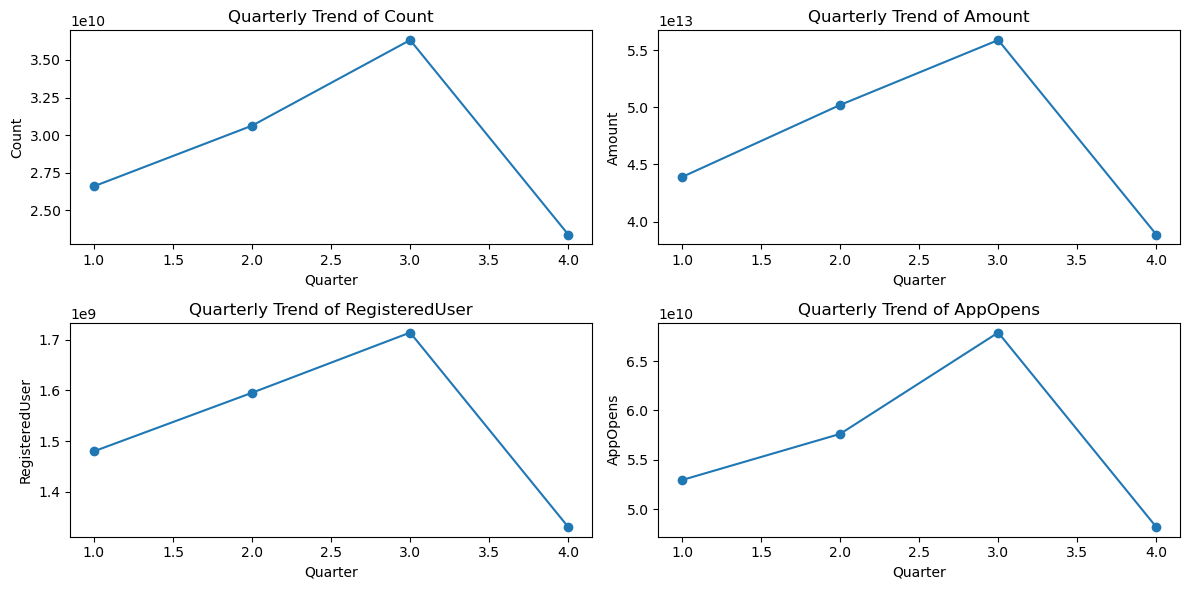

In [62]:
# Filter the DataFrame to include only quarters 1, 2, 3, and 4
valid_quarters = [1, 2, 3, 4]
filtered_df = df[df['Quarter'].isin(valid_quarters)]

# Group the filtered data by 'Quarter' and calculate the sum of each variable
quarterly_data = filtered_df.groupby('Quarter')[['Count', 'Amount', 'RegisteredUser', 'AppOpens']].sum()

# Create a line plot or bar chart for each variable
plt.figure(figsize=(12, 6))

# Line plot for 'Count' over quarters
plt.subplot(2, 2, 1)
plt.plot(quarterly_data.index, quarterly_data['Count'], marker='o')
plt.title('Quarterly Trend of Count')
plt.xlabel('Quarter')
plt.ylabel('Count')

# Line plot for 'Amount' over quarters
plt.subplot(2, 2, 2)
plt.plot(quarterly_data.index, quarterly_data['Amount'], marker='o')
plt.title('Quarterly Trend of Amount')
plt.xlabel('Quarter')
plt.ylabel('Amount')

# Line plot for 'RegisteredUser' over quarters
plt.subplot(2, 2, 3)
plt.plot(quarterly_data.index, quarterly_data['RegisteredUser'], marker='o')
plt.title('Quarterly Trend of RegisteredUser')
plt.xlabel('Quarter')
plt.ylabel('RegisteredUser')

# Line plot for 'AppOpens' over quarters
plt.subplot(2, 2, 4)
plt.plot(quarterly_data.index, quarterly_data['AppOpens'], marker='o')
plt.title('Quarterly Trend of AppOpens')
plt.xlabel('Quarter')
plt.ylabel('AppOpens')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The analysis of quarterly data reveals a pattern of growth from the first quarter to the third quarter, followed by a decrease in the fourth quarter. This cyclic trend suggests a seasonal influence on digital transactions, with higher activity in the earlier part of the year, potentially tied to holidays or specific economic cycles, and a dip toward the end of the year, which could be influenced by year-end financial planning and holidays. Understanding this seasonality can be valuable for businesses in planning their marketing and operational strategies.


The observed trend of a good increase in the 1st to 3rd quarter, followed by a dip in the 4th quarter, can be indicative of a seasonal pattern or a cyclical trend in your data. Here are some possible inferences based on this pattern:

1. **Seasonal Variations:** The increase in the 1st to 3rd quarters, followed by a dip in the 4th quarter, might be related to seasonal variations. This could be due to various factors, such as holidays, weather, or specific events that affect the behavior of your data. For example, if your data is related to retail sales, the increase in quarters 1 to 3 could be associated with holiday shopping seasons, while the dip in the 4th quarter might be after the holiday season ends.

2. **Cyclical Patterns:** The pattern may also indicate cyclical trends in your data. There might be regular cycles or business cycles that influence the behavior of the variables you're analyzing. Understanding these cycles can help with long-term planning and decision-making.

3. **Consumer Behavior:** It's possible that customer or user behavior follows a certain pattern throughout the year. For example, people may be more active in using apps or making purchases during certain times of the year, and this behavior could be linked to factors like changing seasons or major life events.

4. **Economic Factors:** Depending on the nature of your data, economic factors like income, employment, or economic conditions in different quarters could affect the trends you're observing. The 4th-quarter dip could be related to year-end financial considerations.


## 5. Research Questions/ Hypothesis


### "Which payment categories experience the highest growth in transaction volume over time, and are there any emerging trends?"

In [63]:
# Loading our transaction data from the CSV file
data = pd.read_csv("C:/Users/Judge/downloads/agg_trans.csv")

# Calculating the transaction volume over time for each payment category.
# Grouping the data by 'Payment_Category' & 'Year' and summing the transaction counts.
transaction_volume = data.groupby(['Transaction_type', 'Year'])['Transaction_count'].sum().reset_index()

# Calculating growth rates for each payment category.
transaction_volume['Growth_Rate'] = transaction_volume.groupby('Transaction_type')['Transaction_count'].pct_change() * 100

# Finding the payment category with the highest growth rate over time.
highest_growth_category = transaction_volume.groupby('Transaction_type')['Growth_Rate'].max().idxmax()

# Printing the growth rates for all subcategories within 'Transaction_type.'
print("Growth Rates for Subcategories within 'Transaction_type':")
print(transaction_volume)

Growth Rates for Subcategories within 'Transaction_type':
            Transaction_type  Year  Transaction_count  Growth_Rate
0         Financial Services  2018           20384145          NaN
1         Financial Services  2019           12624867   -38.065261
2         Financial Services  2020            8514716   -32.555994
3         Financial Services  2021           13726318    61.206997
4         Financial Services  2022           15890732    15.768351
5         Financial Services  2023           16353997     2.915316
6          Merchant payments  2018          112656898          NaN
7          Merchant payments  2019         1149862129   920.676185
8          Merchant payments  2020         2729138477   137.344844
9          Merchant payments  2021         8436879039   209.140746
10         Merchant payments  2022        20697814959   145.325491
11         Merchant payments  2023        25603796116    23.702894
12                    Others  2018           24575693          NaN
13  

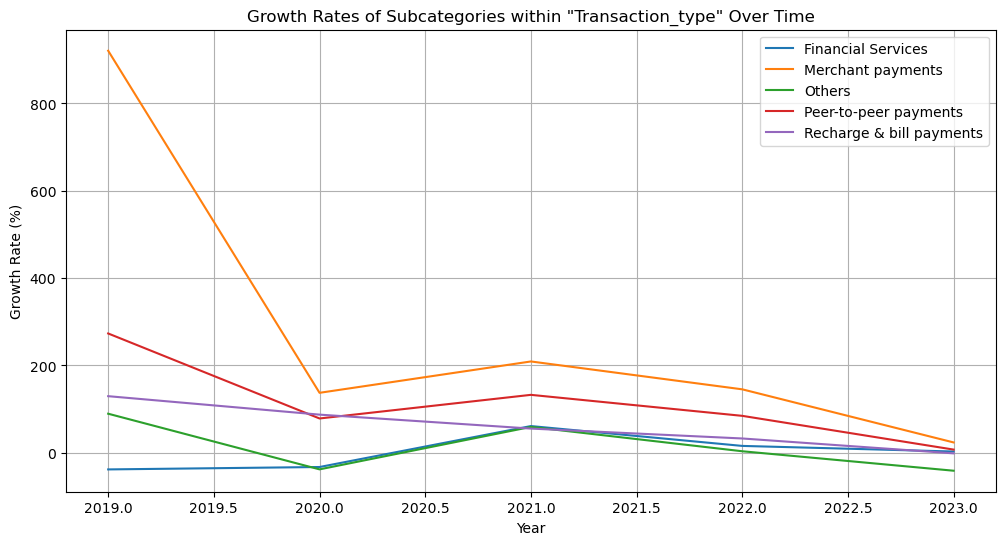

In [64]:
# Creating a line chart to visualize the growth rates over time for each subcategory.
plt.figure(figsize=(12, 6))
for subcategory, group in transaction_volume.groupby('Transaction_type'):
    plt.plot(group['Year'], group['Growth_Rate'], label=subcategory)

plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rates of Subcategories within "Transaction_type" Over Time')
plt.legend()
plt.grid(True)
plt.show()

While initially merchant payments grew rapidly, their growth rate has reduced significantly over the years and now the growth rate for all categories is similar. The initial spike and the followed reduction in growth rates can be explained by the initial craze amongst users to try out the digital payments system and the difficulty of sustaining high growth in long term. The spike in growth rate in 2020 may be attributable to the COVID-19 pandemic and the use of online payments systems to accomodate physical distancing.

## 6. Advanced Data Analysis

### 6.1 K-Means Clustering

In [65]:
# Importing data from our CSV files
df = pd.read_csv('C:/Users/Judge/Downloads/top_user.csv')
df = df.reset_index()
d = pd.read_csv('C:/Users/Judge/Downloads/top_trans.csv')
d = d.reset_index()
df1 = pd.read_csv('C:/Users/Judge/Downloads/agg_user.csv')
df1 = df1.reset_index()
df2 = pd.read_csv('C:/Users/Judge/Downloads/agg_trans.csv')
df2 = df2.reset_index()

In [66]:
#Creating new df by merging two existing ones for analysis
df0=df2.merge(df1,on=["State","Year","Quarter"],how='inner')

C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


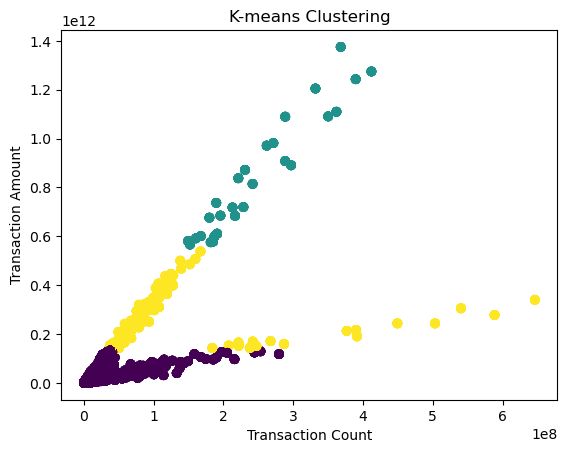

        Transaction_count                            Transaction_amount  \
                     mean       median           std               mean   
Cluster                                                                   
0            6.926608e+06     278060.0  2.035143e+07       6.840029e+09   
1            2.468393e+08  224916139.0  7.594435e+07       8.424965e+11   
2            1.248314e+08   83833356.0  1.202597e+08       2.601546e+11   

                                     
               median           std  
Cluster                              
0        2.065187e+08  1.865994e+10  
1        7.757650e+11  2.424213e+11  
2        2.399333e+11  1.009250e+11  


In [67]:
#Using K-means clustering to form clusters based on the 'Transaction_count' and 'Transaction_amount' features

# Selecting the features for clustering
X = df0[['Transaction_count', 'Transaction_amount']]


K = 3  # Chosen number of clusters

# Creating and fitting the K-means model
kmeans = KMeans(n_clusters=K)
df0['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters using a scatter plot
plt.scatter(df0['Transaction_count'], df0['Transaction_amount'], c=df0['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Transaction Count')
plt.ylabel('Transaction Amount')
plt.show()

cluster_stats = df0.groupby('Cluster')[['Transaction_count', 'Transaction_amount']].agg(['mean', 'median', 'std'])
# Print cluster statistics
print(cluster_stats)

Clustering done based on transaction count and transaction amounts. This clustering is done before performing PCA on the data. As seen, there are no well defined clusters. Later in the file, we've done the same clustering after performing PCA on the data.

C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


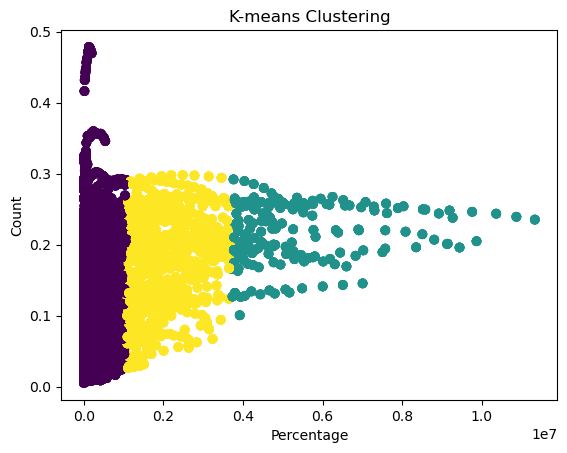

In [68]:
#Using K-means clustering to form clusters based on the 'Count' and 'Percentage' features

# Selecting the features for clustering
X = df0[['Count', 'Percentage']]


K = 3 # Chosen desired number of clusters

# Creating and fitting the K-means model
kmeans = KMeans(n_clusters=K)
df0['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters using a scatter plot
plt.scatter(df0['Count'], df0['Percentage'], c=df0['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Percentage')
plt.ylabel('Count')
plt.show()

Clustering done on count of transactions for brands and their respective percentages

C:\Users\Judge\AppData\Local\Temp\ipykernel_6340\613859060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Transaction_amount'] = scaler.fit_transform(selected_features['Transaction_amount'].values.reshape(-1, 1))
C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_

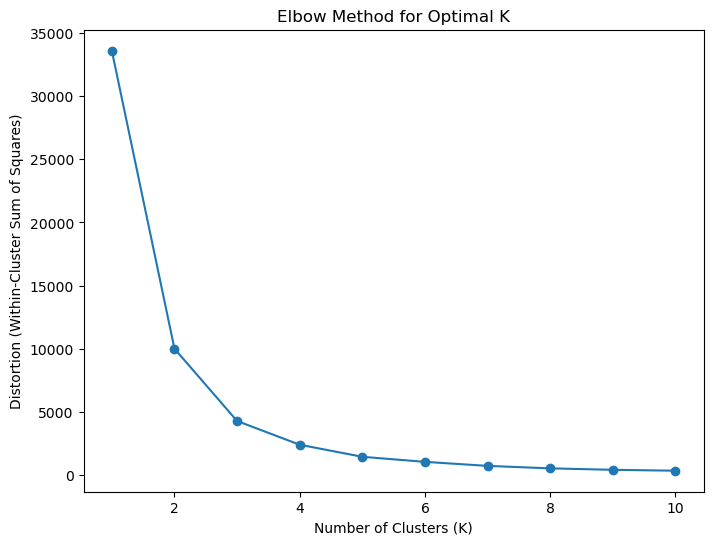

C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Judge\AppData\Local\Temp\ipykernel_6340\613859060.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = kmeans.fit_predict(selected_features[['Transaction_amount']])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


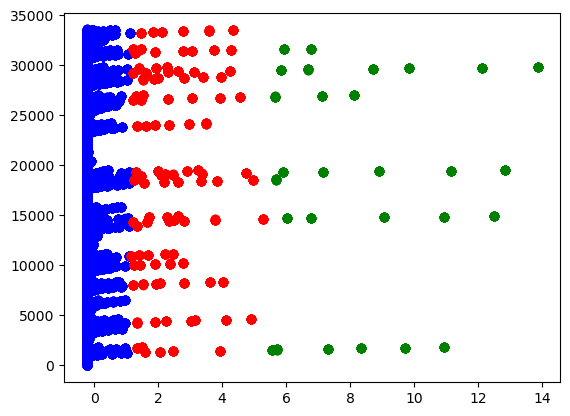

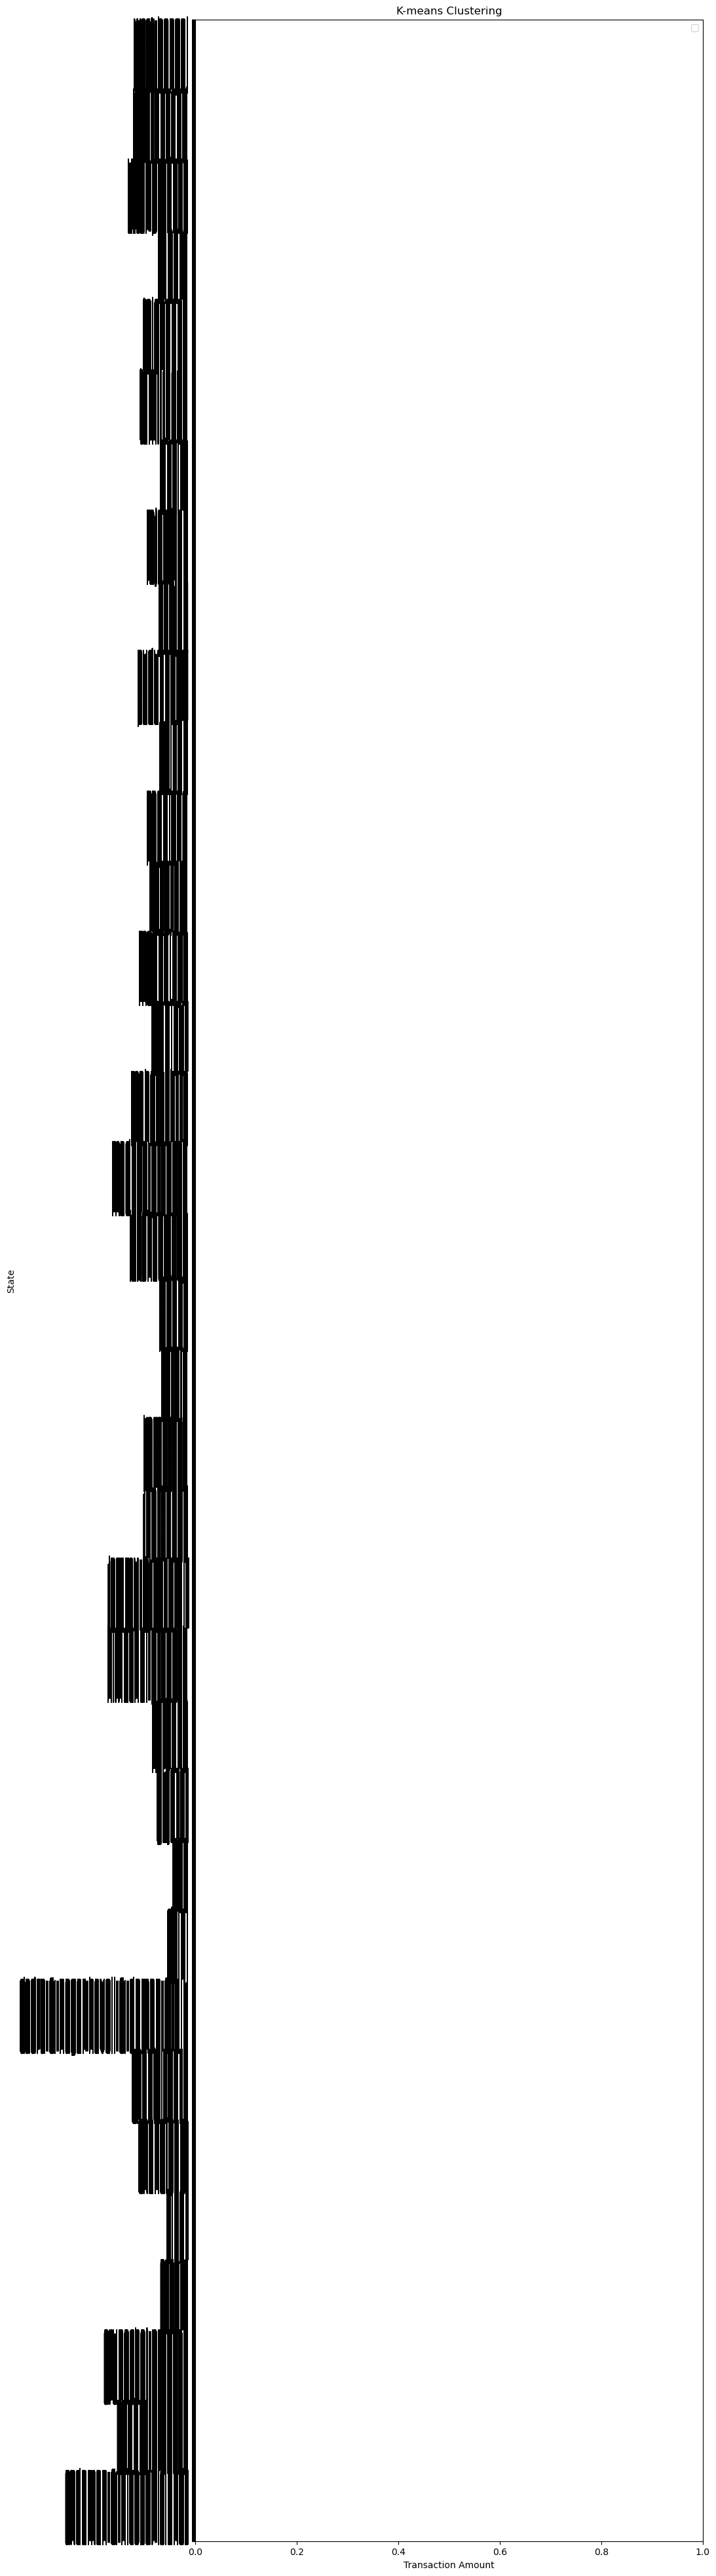

In [69]:
# Selecting relevant features
selected_features = df0[['State', 'Transaction_amount']]

# Standardizing the Transaction_amount column
scaler = StandardScaler()
selected_features['Transaction_amount'] = scaler.fit_transform(selected_features['Transaction_amount'].values.reshape(-1, 1))

# Determining the number of clusters (K) using the Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(selected_features['Transaction_amount'].values.reshape(-1, 1))
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Method to help choose the optimal K
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow Method, choosing the optimal K (number of clusters)
optimal_K = 3 

# Applying K-Means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_K)
selected_features['Cluster'] = kmeans.fit_predict(selected_features[['Transaction_amount']])
n_clusters = selected_features['Cluster'].nunique()

# Create a list of colors for plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


def plot_clusters(selected_features, n_clusters):
    for cluster_id in range(n_clusters):
        cluster_data = selected_features[selected_features['Cluster'] == cluster_id]
        plt.scatter(cluster_data['Transaction_amount'], cluster_data.index, c=colors[cluster_id], label=f'Cluster {cluster_id}')
    plt.figure(figsize=(10,50))
    plt.xlabel('Transaction Amount')
    plt.ylabel('State')
    plt.yticks(selected_features.index, selected_features['State'])
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()

# Plotting clusters with state names
plot_clusters(selected_features, n_clusters)

In the above code, we've used elbow method for choosing the optimal K value for clustering and then performed clustering on the data.

In [70]:
# Importing data from our CSV files
df = pd.read_csv('C:/Users/Judge/Downloads/top_user.csv')
df = df.reset_index()
d = pd.read_csv('C:/Users/Judge/Downloads/top_trans.csv')
d = d.reset_index()

#Creating new df by merging two existing ones for analysis
df= df.merge(d, on=['State','Year','Quarter','Pincode'], how='inner')

In [71]:
# Forming regions based on states for further analysis of data
state_to_region = {
    'andaman-&-nicobar-islands': 'South',
    'andhra-pradesh': 'South',
    'arunachal-pradesh': 'North',
    'assam': 'North',
    'bihar': 'East',
    'chandigarh': 'North',
    'chhattisgarh': 'Central',
    'dadra-&-nagar-haveli-&-daman-&-diu': 'West',
    'delhi': 'North',
    'goa': 'West',
    'gujarat': 'West',
    'haryana': 'North',
    'himachal-pradesh': 'North',
    'jammu-&-kashmir': 'North',
    'jharkhand': 'East',
    'karnataka': 'South',
    'kerala': 'South',
    'ladakh': 'North',
    'lakshadweep': 'South',
    'madhya-pradesh': 'Central',
    'maharashtra': 'West',
    'manipur': 'North',
    'meghalaya': 'North',
    'mizoram': 'North',
    'nagaland': 'North',
    'odisha': 'East',
    'puducherry': 'South',
    'punjab': 'North',
    'rajasthan': 'West',
    'sikkim': 'North',
    'tamil-nadu': 'South',
    'telangana': 'South',
    'tripura': 'North',
    'uttar-pradesh': 'North',
    'uttarakhand': 'North',
    'west-bengal': 'East'
}


# Adding a 'Region' column to your dataset based on the mapping
df['Region'] = df['State'].map(state_to_region)

# Creating a numerical representation of the regions
df['RegionCode'] = df['Region'].map({'North': 1, 'East': 2, 'South': 3, 'West': 4, 'Central': 5})

# Selecting the relevant features for clustering (e.g., 'RegionCode')
X = df[['RegionCode']]

# Determining the number of clusters (K)
K = 4

# Applying K-Means clustering
kmeans = KMeans(n_clusters=K)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Judge\AppData\Local\Temp\ipykernel_6340\2846640641.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = kmeans.fit_predict(selected_features[['Transaction_amount']])
C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


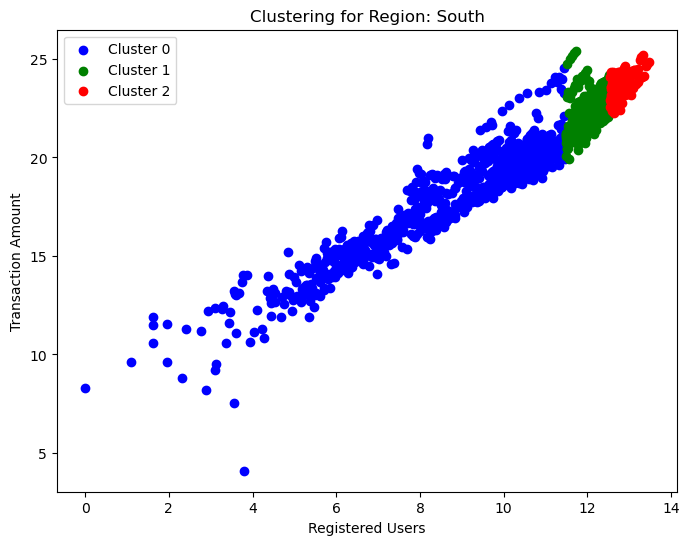

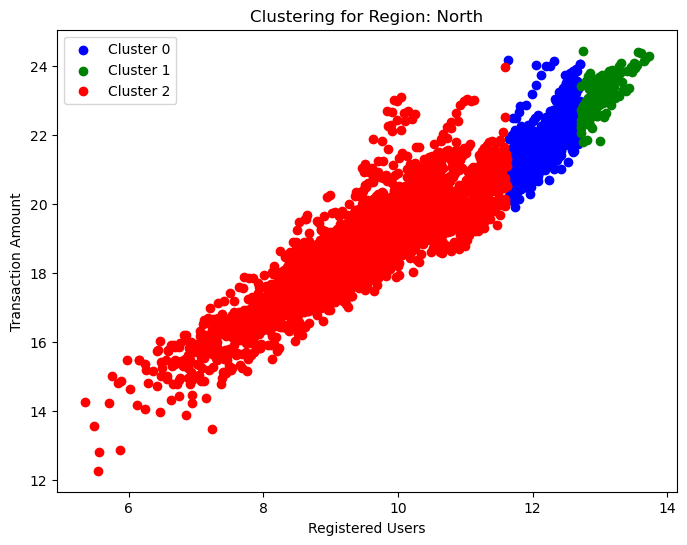

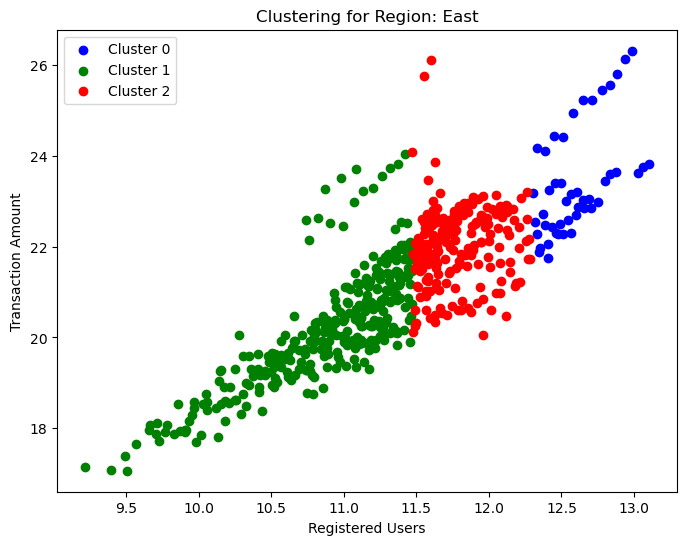

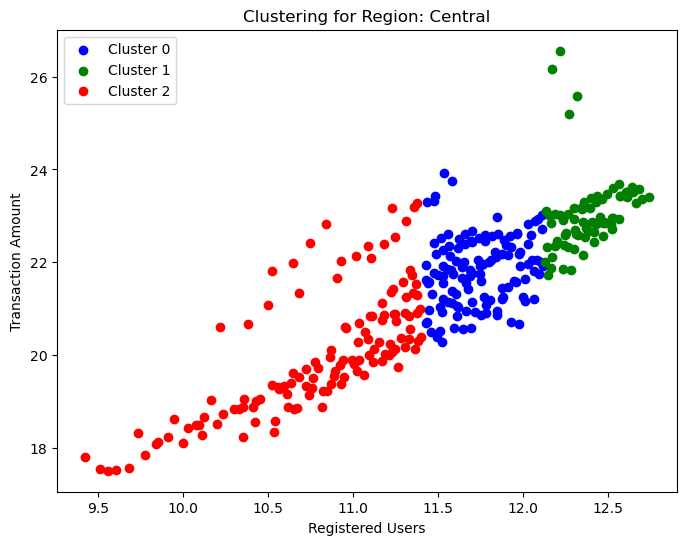

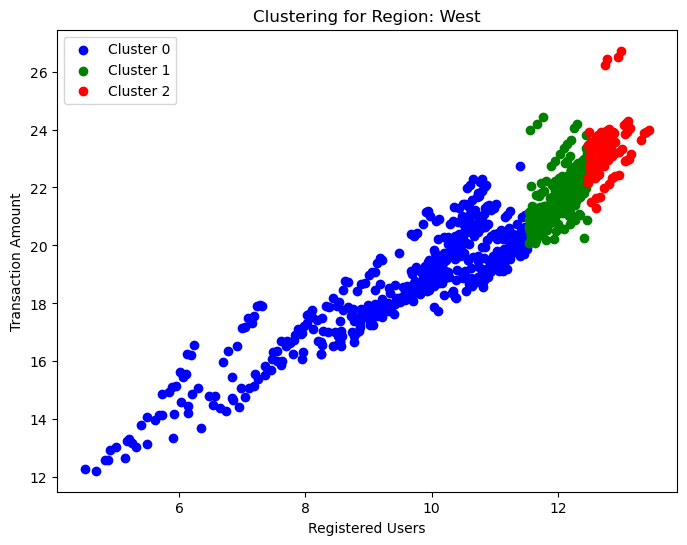

In [72]:
# Selecting the data for clustering
cluster_data = df[['Region', 'RegisteredUsers']]

# Applying K-Means clustering within each region
for region in cluster_data['Region'].unique():
    region_data = cluster_data[cluster_data['Region'] == region]
    
    # Determining the optimal number of clusters using the Elbow Method
    optimal_K = 3  # Adjust this based on your data

    # Applying K-Means clustering with the chosen K
    kmeans = KMeans(n_clusters=optimal_K)
    selected_features['Cluster'] = kmeans.fit_predict(selected_features[['Transaction_amount']])
    n_clusters = selected_features['Cluster'].nunique()
    # Creating and fitting the K-Means model
    kmeans = KMeans(n_clusters=optimal_K)
    region_data['Cluster'] = kmeans.fit_predict(region_data[['RegisteredUsers']])

    # Adding the clustered data back to the original DataFrame
    df.loc[df['Region'] == region, 'Cluster'] = region_data['Cluster']
    regions = df['Region'].unique()

# Defining a color map for the clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Looping through each region and creating a scatter plot
for region in regions:
    region_data = df[df['Region'] == region]
    num_clusters = region_data['Cluster'].nunique()

    plt.figure(figsize=(8, 6))
    
    # Plotting each cluster with a different color
    for i in range(num_clusters):
        cluster_data = region_data[region_data['Cluster'] == i]
        plt.scatter( np.log(cluster_data['RegisteredUsers']),np.log(cluster_data['Transaction_amount']), c=colors[i], label=f'Cluster {i}')

    plt.title(f'Clustering for Region: {region}')
    plt.ylabel('Transaction Amount')
    plt.xlabel('Registered Users')
    plt.legend()
    plt.show()


Clustering done based on regions formed above and registered users for each region. Once again, no clear clusters are visible. Perhaps clustering after performing PCA would be a better choice in the future.

### 6.2 Linear Regression

In [73]:
# Choosing predictor variables
X = df[['Year', 'Quarter']]
y = df['RegisteredUsers']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicting the number of users for the next year
next_year_data = pd.DataFrame({'Year': [2023], 'Quarter': [4]})
next_year_prediction = model.predict(next_year_data)

print(f"Predicted Number of Users for the Next Year: {next_year_prediction[0]}")

Mean Squared Error: 11716974008.50783
Predicted Number of Users for the Next Year: 159090.07868020236


Here we've used Linear regression to predict the number of users for the upcoming year along by regressing  with the Mean squared error for the same.

In [74]:
# Choosing predictor variables
X = df[['Year', 'Quarter']]
y = df['Transaction_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predicting the number of users for the next year
next_year_data = pd.DataFrame({'Year': [2023], 'Quarter': [4]})
next_year_prediction = model.predict(next_year_data)

print(f"Predicted Number of Users for the Next Year: {next_year_prediction[0]}")

Mean Squared Error: 2.333231610628442e+20
Predicted Number of Users for the Next Year: 9203794365.898926


### 6.3 Principal Component Analysis


In [75]:
df

,index_x,State,Year,Quarter,Pincode,RegisteredUsers,index_y,Transaction_count,Transaction_amount,Region,RegionCode,Cluster
0,0,andaman-&-nicobar-islands,2018,1,744103,1608,1,1223,2.238042e+06,South,3,0
1,1,andaman-&-nicobar-islands,2018,1,744101,1108,0,1622,2.769298e+06,South,3,0
2,2,andaman-&-nicobar-islands,2018,1,744105,1075,3,685,1.298561e+06,South,3,0
3,3,andaman-&-nicobar-islands,2018,1,744102,1006,2,969,3.519060e+06,South,3,0
4,4,andaman-&-nicobar-islands,2018,1,744104,272,4,340,1.039715e+06,South,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5932,8202,west-bengal,2023,3,700006,155979,8204,3709713,6.909274e+09,East,2,2
5933,8203,west-bengal,2023,3,700135,141013,8201,6459974,7.717822e+09,East,2,2
5934,8204,west-bengal,2023,3,700156,128192,8200,8289388,7.339618e+09,East,2,2
5935,8205,west-bengal,2023,3,700039,122792,8207,3405551,5.095825e+09,East,2,2


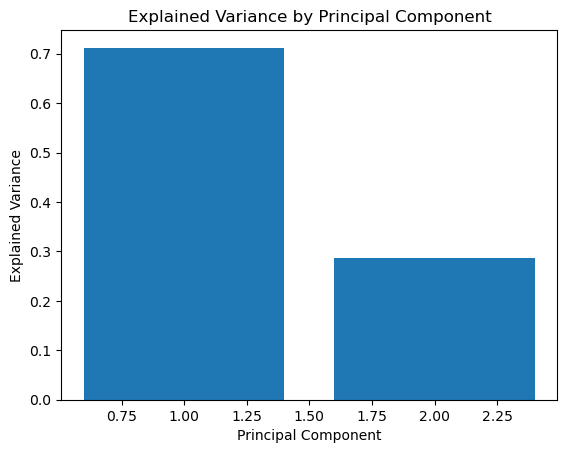

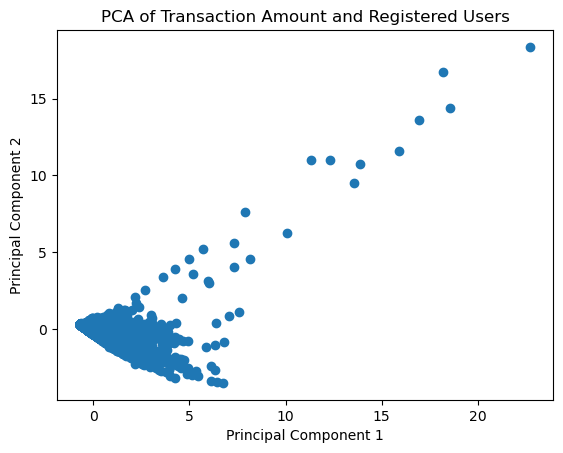

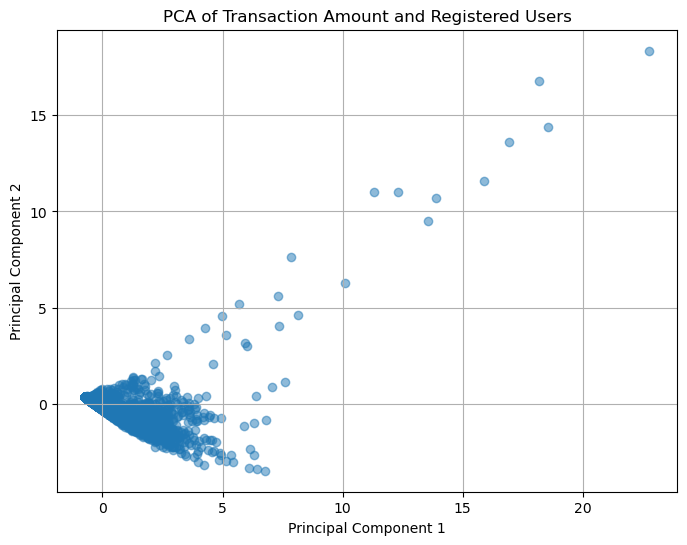

In [76]:
# Selecting the columns for PCA
selected_columns = ['Transaction_amount', 'RegisteredUsers']

# Standardizing the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_columns])

# Initializing PCA with 2 components
pca = PCA(n_components=2)

# Fitting PCA to the scaled data
pca.fit(scaled_data)

# Transforming the data into the principal components
pca_data = pca.transform(scaled_data)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Adding the original data columns to the PCA DataFrame (for reference)
pca_df['Transaction_amount'] = df['Transaction_amount']
pca_df['RegisteredUsers'] = df['RegisteredUsers']

# Visualizing the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

# Visualizing the PCA data
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transaction Amount and Registered Users')
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Transaction Amount and Registered Users')
plt.grid()
plt.show()

We've performed PCA on Transaction amount and Registered Users. While there are no obvious clusters to indicate patterns  or relationships between 'Transaction_amount' and 'RegisteredUsers', PCA has reduced the dimensionality of the data while preserving the most important patterns.So, the data has been projected into a two-dimensional space, making it easier and analyze.

### 6.4 KMeans Clustering after doing PCA

C:\Users\Judge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Judge\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


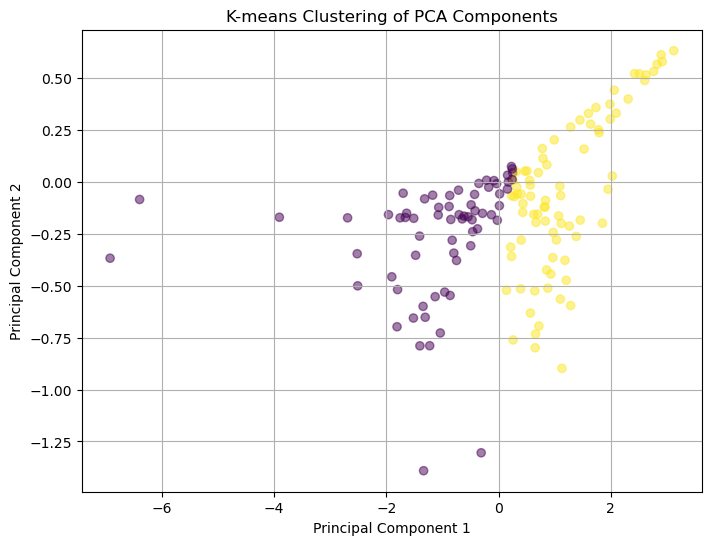

In [77]:
# Selecting the columns for PCA
selected_columns = ['Transaction_amount', 'RegisteredUsers']

# Standardizing the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_columns])

# Initializing PCA with 2 components
pca = PCA(n_components=2)

# Fitting PCA to the scaled data
pca.fit(scaled_data)

# Transforming the data into the principal components
pca_data = pca.transform(scaled_data)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])

# Applying K-means clustering to the PCA components
K = 2 # Replace with your desired number of clusters

kmeans = KMeans(n_clusters=K, random_state=0)
pca_df['Cluster'] = kmeans.fit_predict(pca_data)

# Visualizing the clusters on the PCA scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.log(pca_df['Principal Component 1']),np.log(pca_df['Principal Component 2'])/np.log(100), c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of PCA Components')
plt.grid()
plt.show()

Upon clustering after performing PCA, we've got more clearer clusters than before. 

### 6.5 Anova Test to check for brand related differences

In [78]:
# Importing data from our CSV files
df = pd.read_csv('C:/Users/Judge/Downloads/agg_user.csv')
df = df.reset_index()
d=pd.read_csv('C:/Users/Judge/Downloads/agg_trans.csv')
d = d.reset_index()

In [79]:
#Creating new df by merging two existing ones for analysis
df=df.merge(d,on=['State','Year','Quarter'],how='inner')

In [80]:
# Performing ANOVA to test for brand-related differences in Transaction_amount
brands = df['Brands'].unique()
anova_results = {}

for brand in brands:
    subset = df[df['Brands'] == brand]
    anova_results[brand] = subset['Transaction_amount']

f_statistic, p_value = f_oneway(*anova_results.values())

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There are significant differences between brands.")
else:
    print("There are no significant differences between brands.")
print(anova_results)

F-statistic: 6.706260342474569
P-value: 4.908000843528512e-18
There are significant differences between brands.
{'Xiaomi': 0        1.845307e+06
1        1.213866e+07
2        4.525072e+05
3        1.060142e+04
4        1.846899e+05
             ...     
33539    4.463437e+11
33540    8.585473e+10
33541    1.843542e+10
33542    2.610966e+08
33543    5.316713e+08
Name: Transaction_amount, Length: 3054, dtype: float64, 'Samsung': 5        1.845307e+06
6        1.213866e+07
7        4.525072e+05
8        1.060142e+04
9        1.846899e+05
             ...     
33544    4.463437e+11
33545    8.585473e+10
33546    1.843542e+10
33547    2.610966e+08
33548    5.316713e+08
Name: Transaction_amount, Length: 3054, dtype: float64, 'Vivo': 10       1.845307e+06
11       1.213866e+07
12       4.525072e+05
13       1.060142e+04
14       1.846899e+05
             ...     
33549    4.463437e+11
33550    8.585473e+10
33551    1.843542e+10
33552    2.610966e+08
33553    5.316713e+08
Name: Transaction_am